In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
# Loading in the kuderna mutation data and new metadata

kuderna_data = pd.read_csv("../data/science.abn7829_data_s2.csv")
# I pick out the following columns
col_species_mut = ['SPECIES_BINOMIAL', 'GENUS', 'SPECIES', 'FAMILY', 'GENERATION_LENGTH', 'MU_PER_GENERATION',
       'MU_PER_YEAR', 'EFFECTIVE_POP_SIZE']
df_species_mut = kuderna_data[col_species_mut]

metadata_dir = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_dirs = glob.glob(metadata_dir+"*_individuals.txt")

df_l = []
for d in metadata_dirs:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    df_l.append(dir_metadata)
all_inds = pd.concat(df_l)

In [3]:
glob.glob("../steps/cobraa/*/aut_D50_ts4_te40*")

['../steps/cobraa/PD_0099/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0093/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0032/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0114/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0121/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA112483167/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0051/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0352/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0119/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0138/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0042/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMEA115412632/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMN07763310/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/SAMN02850871/aut_D50_ts4_te40_final_parameters.txt',
 '../steps/cobraa/PD_0605/aut_D50_ts4_te40_final_par

In [5]:
def get_gamma_from_file(file):
    lines = !cat {file}
    return float([i for i in lines if 'gamma' in i][0].split(' ')[-1])
    
def get_LL_from_file(filename):
    with open(filename) as f:
        lines = f.readlines()
    return float([i for i in lines if 'likelihood' in i and 'final' in i][0].split(' ')[-1])

In [27]:
def find_best(file_list):
    best_param_file = None
    best_val = None
    # Go through the files and pick the 
    for p in file_list:
        LL = get_LL_from_file(p)
        if best_val == None:
            best_val = LL
            best_param_file = p
        if best_val < LL:
            best_val = LL
            best_param_file = p

    with open(best_param_file) as f:
        finallines = f.readlines()
    ztheta = float([i for i in finallines if 'theta' in i ][0].split(' ')[-1])
    zrho = float([i for i in finallines if 'rho' in i ][0].split(' ')[-1])
    zgamma = float([i for i in finallines if 'gamma' in i ][0].split(' ')[-1])
    file_name = best_param_file.split("/")[-1]
    zte = int(file_name.split("te")[1].split("_")[0])
    zts = int(file_name.split("ts")[1].split("_")[0])
    
    final_params = np.loadtxt(best_param_file)
    lambdaA_parameters = ",".join([str(x) for x in final_params[:,2]*ztheta/4])
    lambdaB_parameters = ",".join([str(x) for x in final_params[:,3]*ztheta/4])
    return zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file

Hoolock_hoolock_ssp
PD_0522 -7638350.219959249 211.81116859335452
40 34 0.14461252771408545 ../steps/cobraa/PD_0522/aut_D50_ts34_te40_final_parameters.txt
5.86e-09 13.5
PD_0525 -9024555.957044957 -65.90651502646506
16 10 0.4381330251354621 ../steps/cobraa/PD_0525/aut_D50_ts10_te16_final_parameters.txt
5.86e-09 13.5
Hoolock_leuconedys_ssp
SAMN43386187 -6398340.767898463 191.33096549008042
40 34 0.22086821870917953 ../steps/cobraa/SAMN43386187/aut_D50_ts34_te40_final_parameters.txt
5.86e-09 13.5
Galago_senegalensis_ssp
SAMN09702733 -10248755.762719508 907.509336611256
28 22 0.23346486024534047 ../steps/cobraa/SAMN09702733/aut_D50_ts22_te28_final_parameters.txt
5.97e-09 6.0
Saguinus_oedipus_ssp
PD_0122 -7905176.207555968 449.29330055695027
28 22 0.37113031646346684 ../steps/cobraa/PD_0122/aut_D50_ts22_te28_final_parameters.txt
4.82e-09 6.0
Saguinus_midas_ssp
PD_0121 -21526873.17213715 4523.783681381494
34 10 0.09857916741542365 ../steps/cobraa/PD_0121/aut_D50_ts10_te34_final_parameters.tx

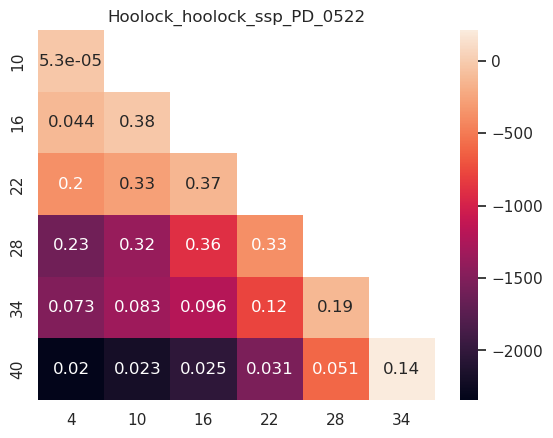

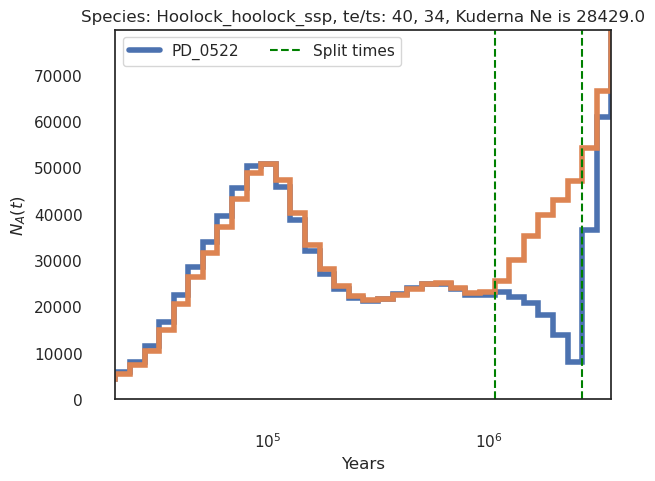

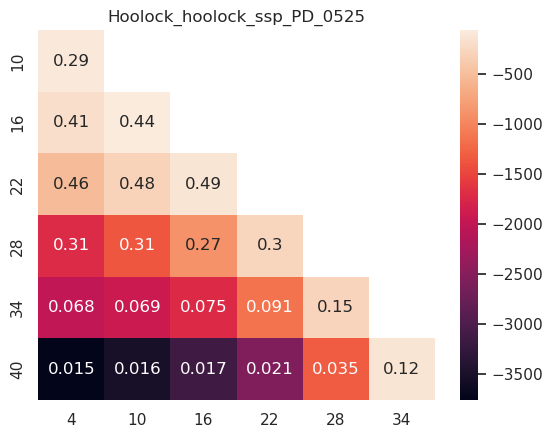

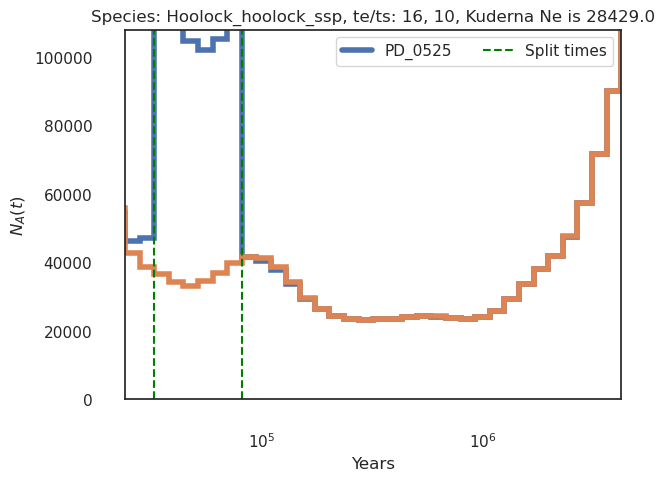

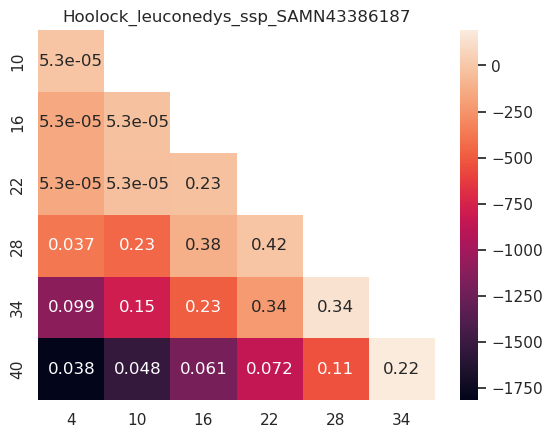

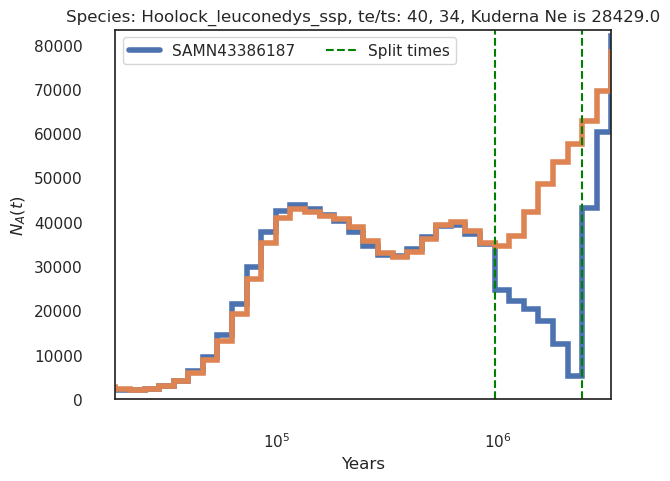

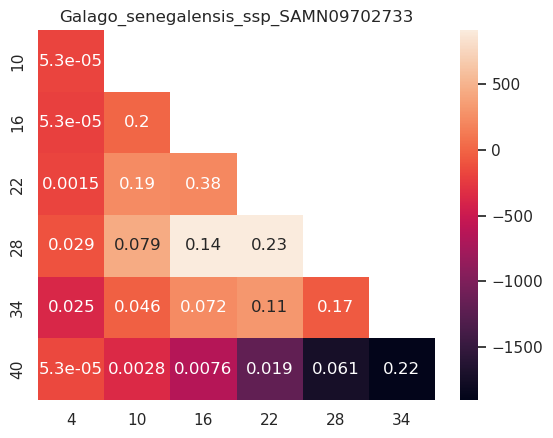

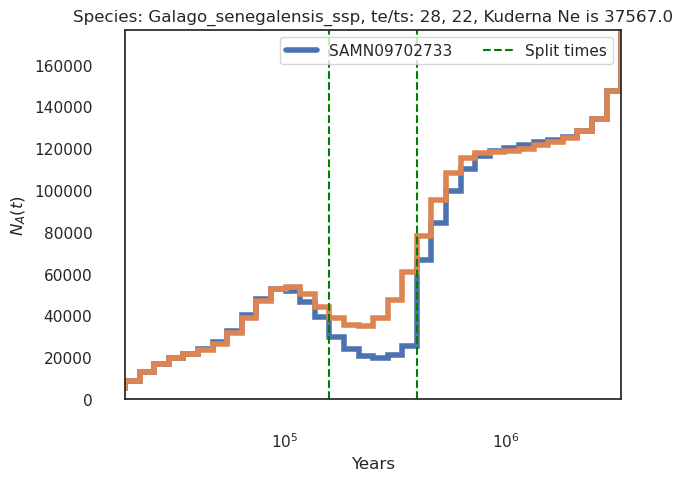

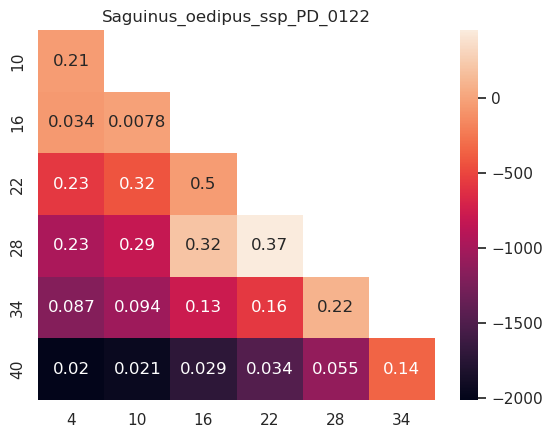

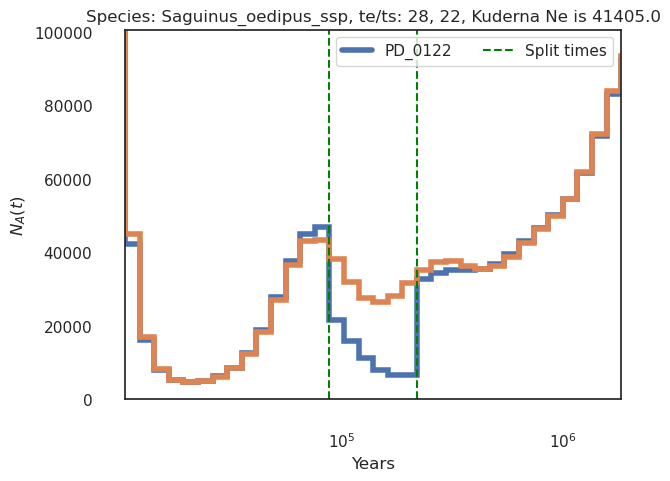

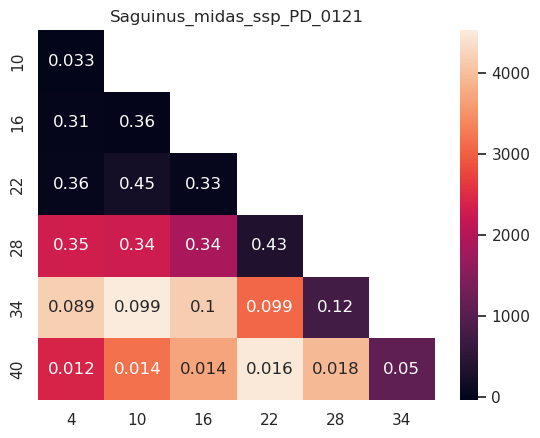

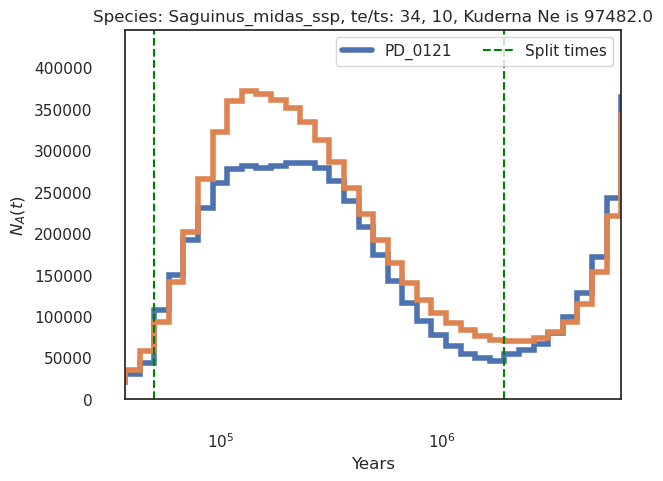

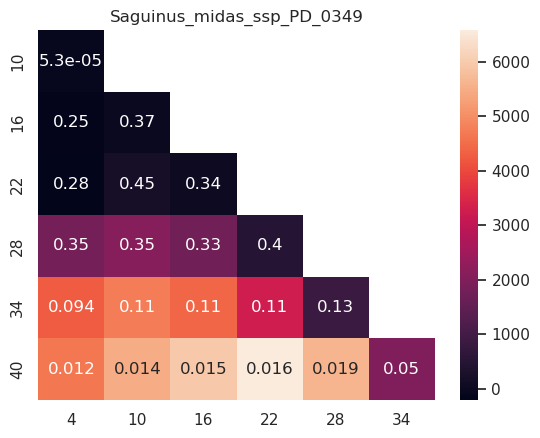

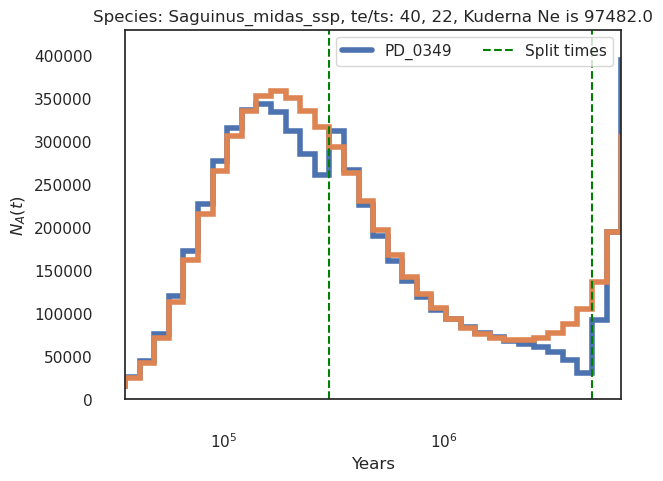

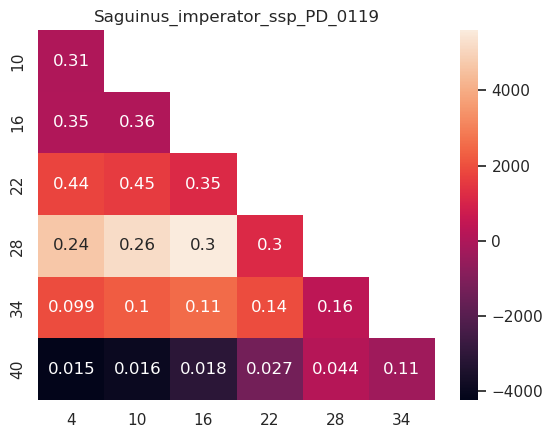

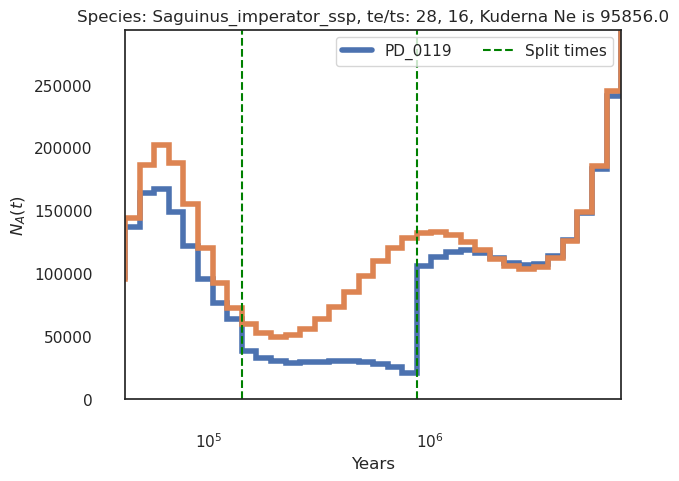

<Figure size 640x480 with 0 Axes>

In [42]:
for d in metadata_dirs[:5]:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_gamma = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
                    matrix_LL_gamma[int((te-6)/6),int(ts/6)] = get_gamma_from_file(final_params_file_struct)
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs))
            g = sns.heatmap(matrix_LL_diffs, annot=matrix_LL_gamma)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()
            # Structured plot
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            # plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            scaled_time = (time_array/mu)*gen
            plt.xlim(scaled_time[min(zts-2, 8)],scaled_time[42])
            plt.ylim(-1, 1.2*max(((1/final_params[:,2])/mu)[8:42]))
            plt.stairs(edges=scaled_time,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Papio_hamadryas_ssp
SAMEA112483168 -14494906.097818607 729.0350815113634
28 16 0.2855779807275157 ../steps/cobraa/SAMEA112483168/aut_D50_ts16_te28_final_parameters.txt
6.08e-09 15.0
SAMEA112483167 -15366196.144205596 1149.711641740054
28 16 0.2664432365613792 ../steps/cobraa/SAMEA112483167/aut_D50_ts16_te28_final_parameters.txt
6.08e-09 15.0
Papio_cynocephalus_ssp
SAMEA112483237 -21906762.001683395 4180.060977060348
28 10 0.3165423122822582 ../steps/cobraa/SAMEA112483237/aut_D50_ts10_te28_final_parameters.txt
5.88e-09 17.0
SAMEA112483239 -22577685.822147124 4767.051408749074
28 10 0.31454980768889174 ../steps/cobraa/SAMEA112483239/aut_D50_ts10_te28_final_parameters.txt
5.88e-09 17.0
Papio_anubis_ssp
SAMN43494766 -18637545.416487016 4437.5428510047495
28 4 0.2608795217081541 ../steps/cobraa/SAMN43494766/aut_D50_ts4_te28_final_parameters.txt
3.91e-09 11.0
SAMN43494761 -17806946.33250666 3747.098239596933
28 4 0.2786448013943805 ../steps/cobraa/SAMN43494761/aut_D50_ts4_te28_final_paramete

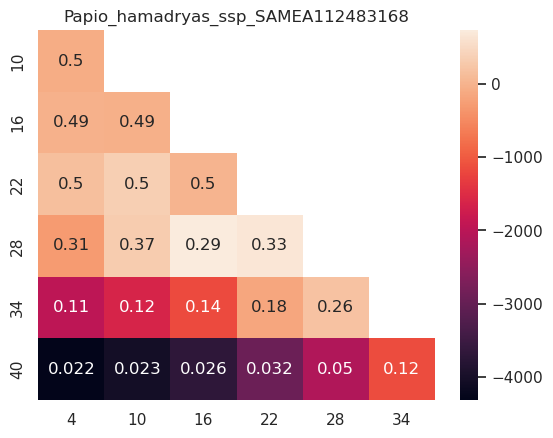

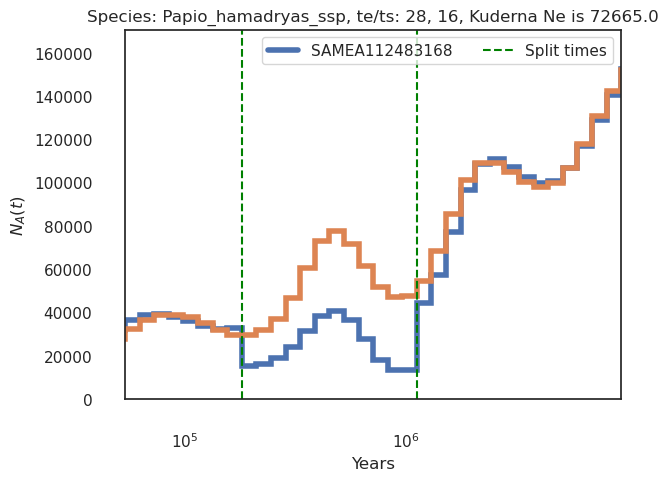

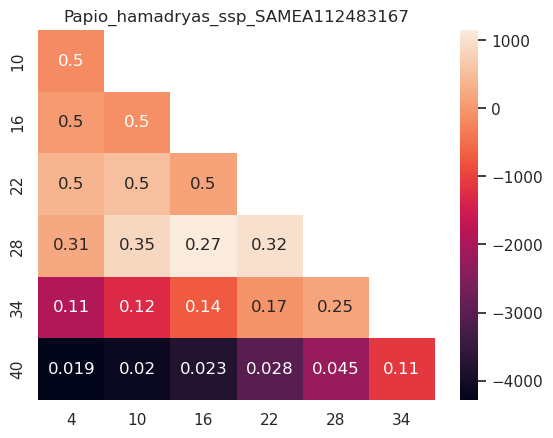

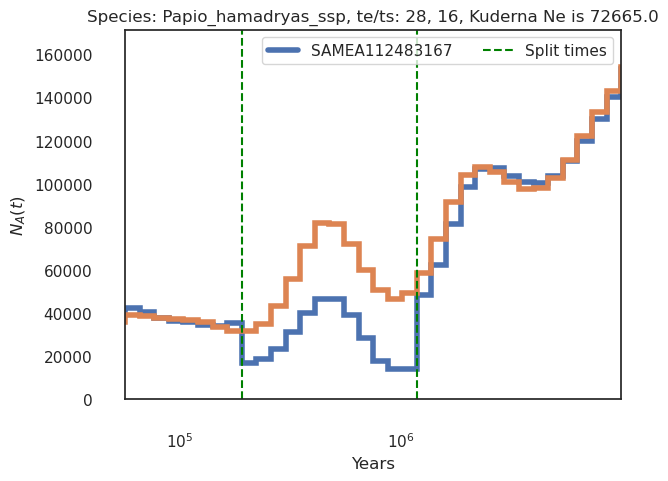

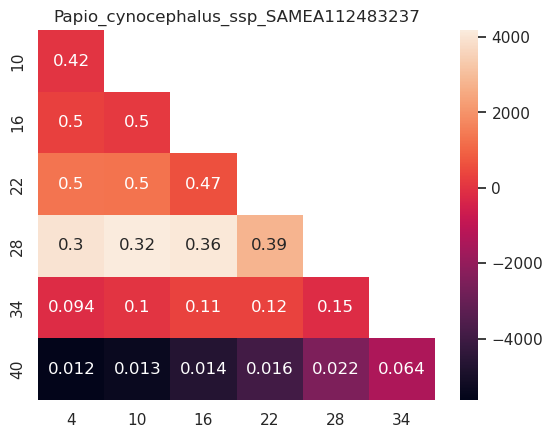

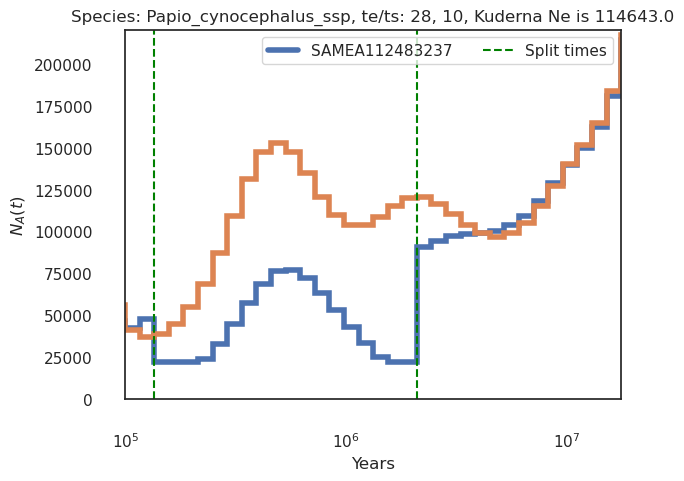

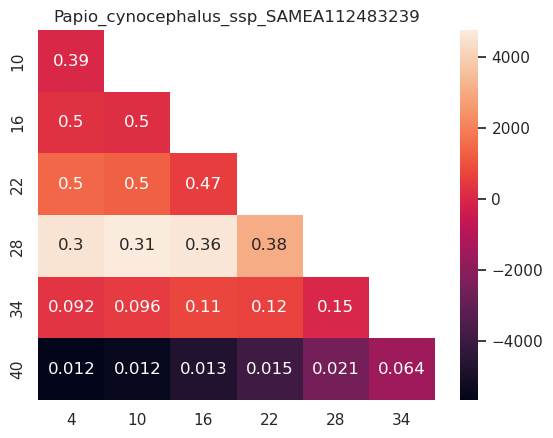

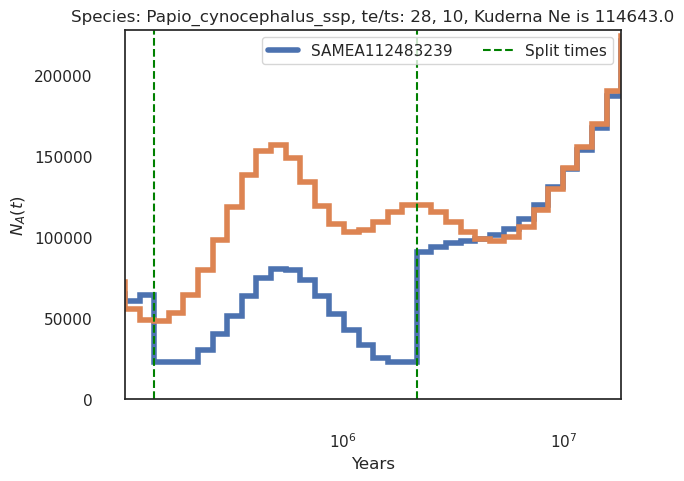

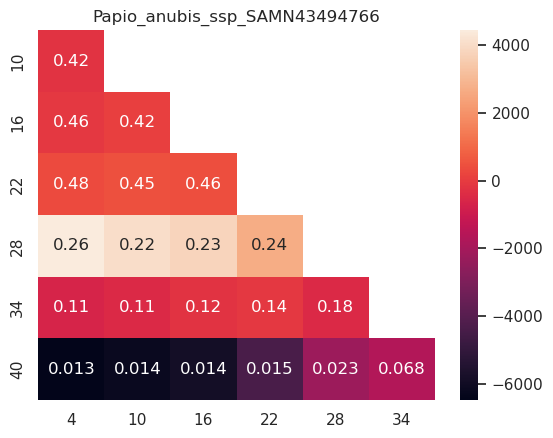

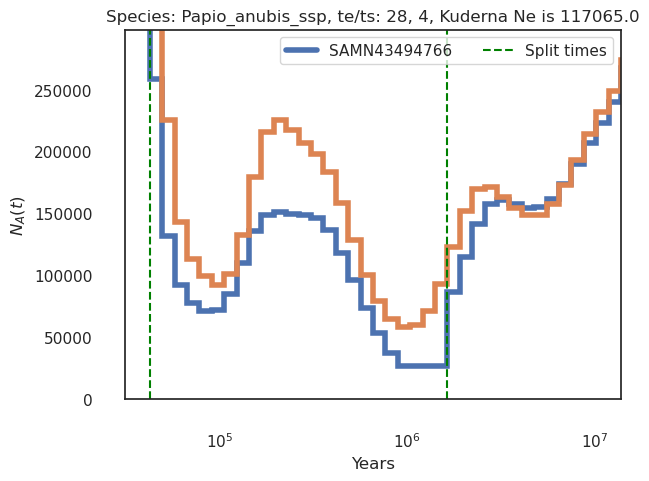

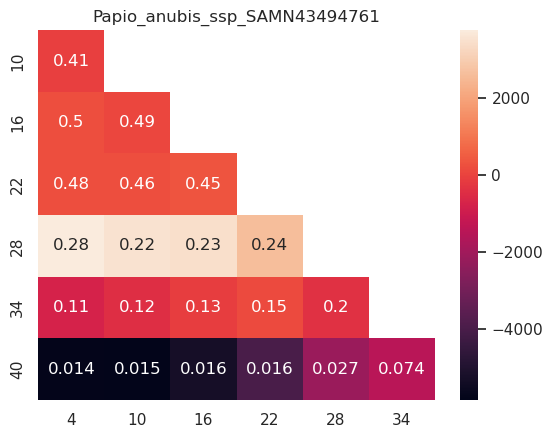

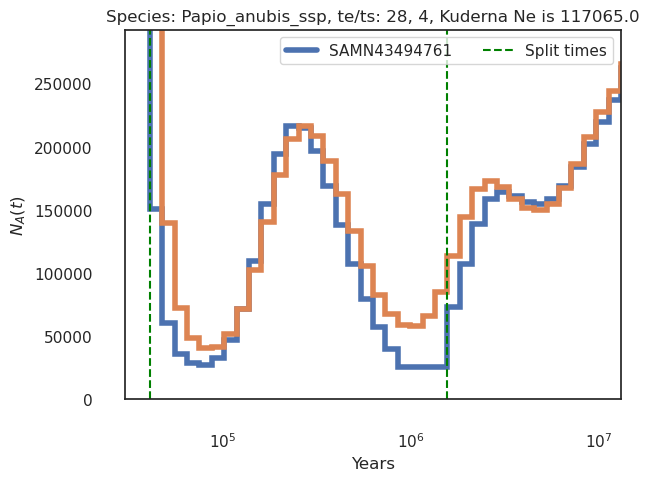

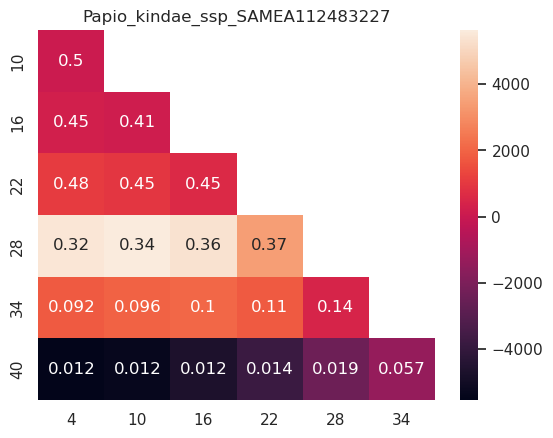

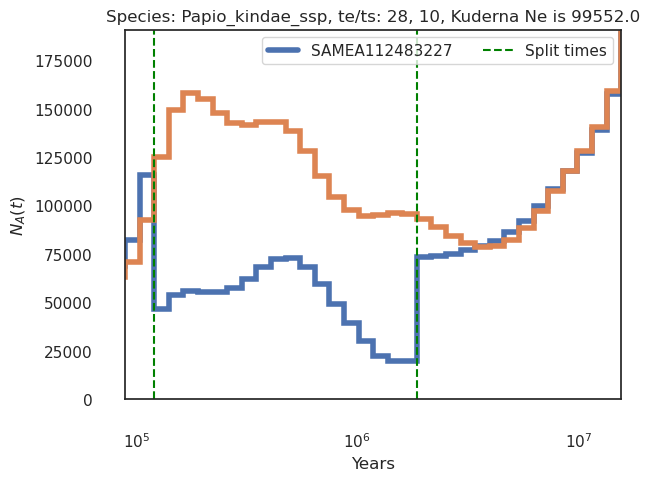

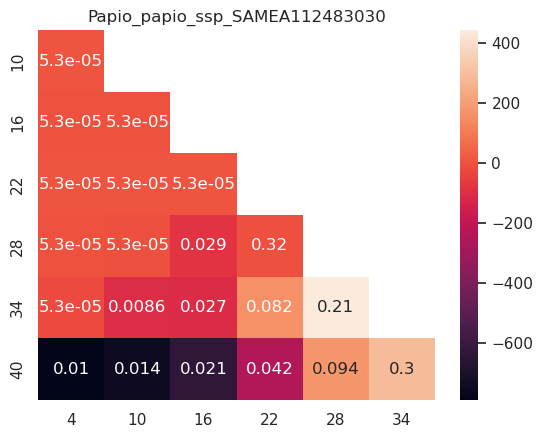

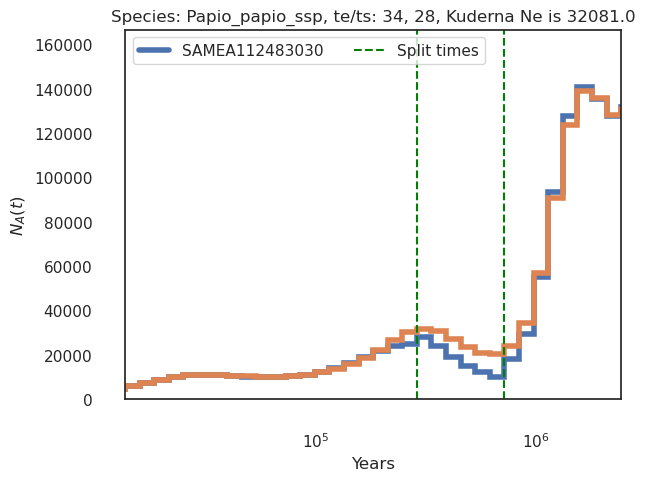

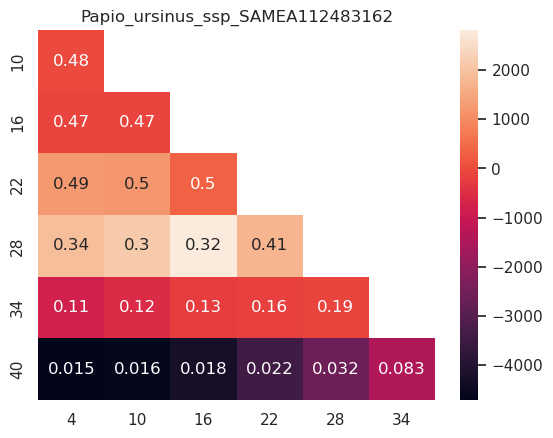

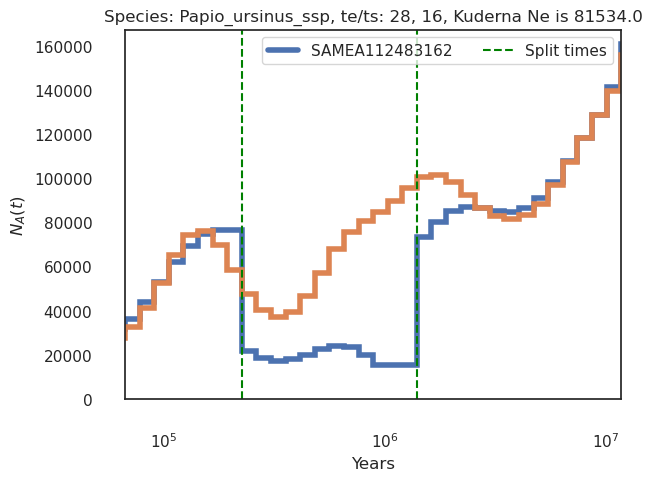

<Figure size 640x480 with 0 Axes>

In [41]:
for d in metadata_dirs[5:6]:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_gamma = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
                    matrix_LL_gamma[int((te-6)/6),int(ts/6)] = get_gamma_from_file(final_params_file_struct)
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs))
            g = sns.heatmap(matrix_LL_diffs, annot=matrix_LL_gamma)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()
            # Structured plot
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            # plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            scaled_time = (time_array/mu)*gen
            plt.xlim(scaled_time[min(zts-2, 8)],scaled_time[42])
            plt.ylim(-1, 1.2*max(((1/final_params[:,2])/mu)[8:42]))
            plt.stairs(edges=scaled_time,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Nomascus_gabriellae_ssp
PD_0051 -15257652.757102646 1035.9078386984766
28 22 0.32636528665376163 ../steps/cobraa/PD_0051/aut_D50_ts22_te28_final_parameters.txt
1.08e-08 15.0
Nomascus_siki_ssp
PD_0099 -17815603.66142821 3538.8335923478007
34 22 0.17562860748876413 ../steps/cobraa/PD_0099/aut_D50_ts22_te34_final_parameters.txt
8.77e-09 15.0
Nomascus_leucogenys_ssp
SAMN02850871 -15599435.016585963 967.479607315734
22 4 0.30913625265501027 ../steps/cobraa/SAMN02850871/aut_D50_ts4_te22_final_parameters.txt
9.420000000000001e-09 15.0
Chlorocebus_sabaeus_ssp
SAMN01162282 -14417612.409547431 886.6252680532634
28 16 0.11127349548144762 ../steps/cobraa/SAMN01162282/aut_D50_ts16_te28_final_parameters.txt
4.53e-09 11.0
Chlorocebus_pygerythrus_ssp
SAMN07763310 -18142722.16055774 4212.083828419447
28 4 0.20057610987219823 ../steps/cobraa/SAMN07763310/aut_D50_ts4_te28_final_parameters.txt
4.53e-09 11.0
Cercopithecus_mitis_ssp
SAMN25565059 -11669918.188317072 3516.304819231853
34 16 0.0974712147717416

/tmp/12758059/ipykernel_1062328/2651769191.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


PD_0060 -26302643.28072436 9563.006328724325
34 4 0.06034506964341816 ../steps/cobraa/PD_0060/aut_D50_ts4_te34_final_parameters.txt
3.52e-09 10.0
Cercopithecus_ascanius_ssp
PD_0032 -34224735.58996897 23677.30100929737
28 4 0.36073075957719153 ../steps/cobraa/PD_0032/aut_D50_ts4_te28_final_parameters.txt
6.04e-09 12.0
Cercopithecus_wolfi_ssp
SAMEA115412632 -17049902.21970333 1968.2537771724164
28 4 0.18521106026917444 ../steps/cobraa/SAMEA115412632/aut_D50_ts4_te28_final_parameters.txt
4.8549999999999995e-09 10.166666666666666
Cercopithecus_denti_ssp
SAMEA115412631 -17166320.32837566 1995.775157250464
34 16 0.07045403674837201 ../steps/cobraa/SAMEA115412631/aut_D50_ts16_te34_final_parameters.txt
4.8549999999999995e-09 10.166666666666666
Pygathrix_nemaeus_ssp
SAMN07678108 -13489683.728189614 2045.2805125117302
34 22 0.15737026901368564 ../steps/cobraa/SAMN07678108/aut_D50_ts22_te34_final_parameters.txt
8.58e-09 11.0
SAMN16949012 -14323197.11006885 2040.522078083828
34 22 0.14393750289734

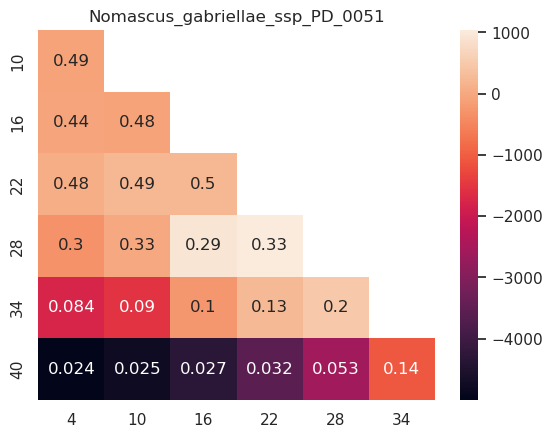

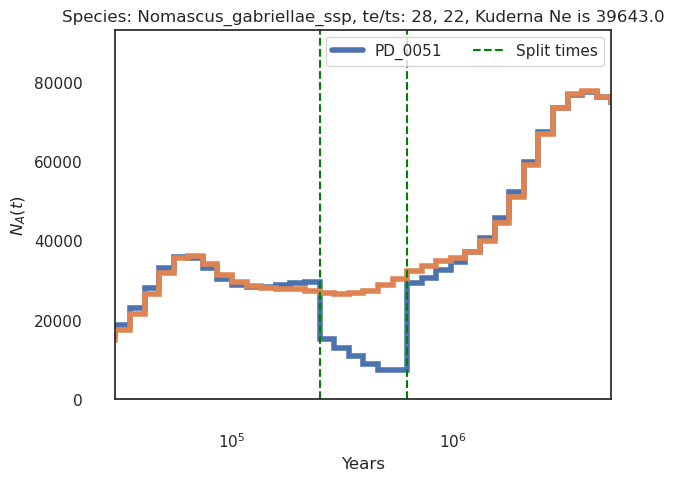

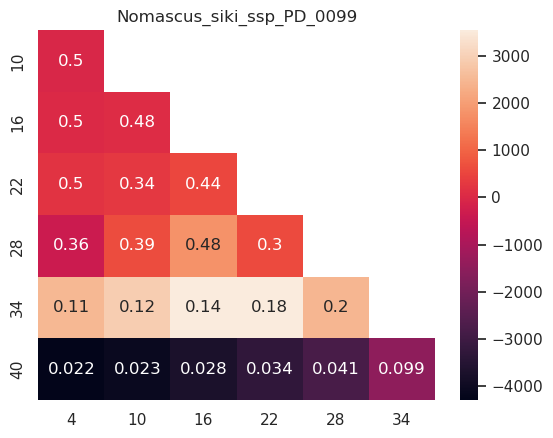

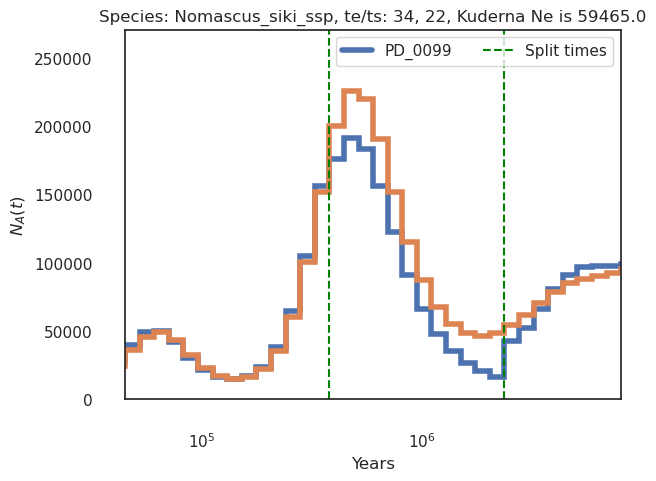

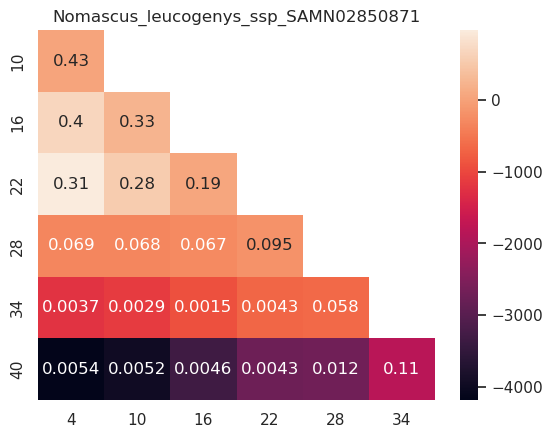

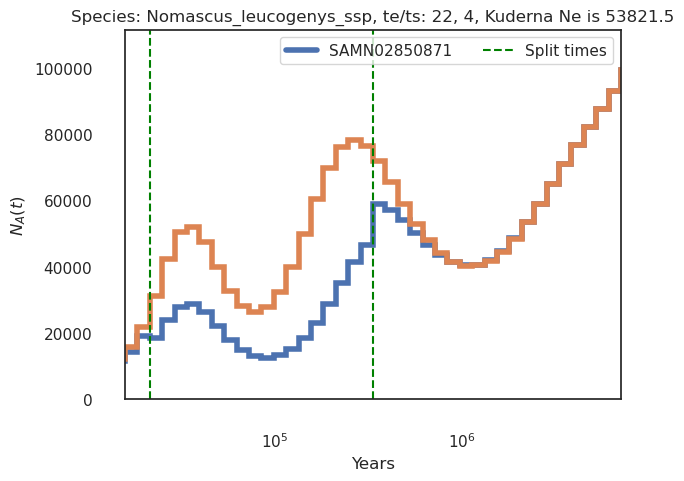

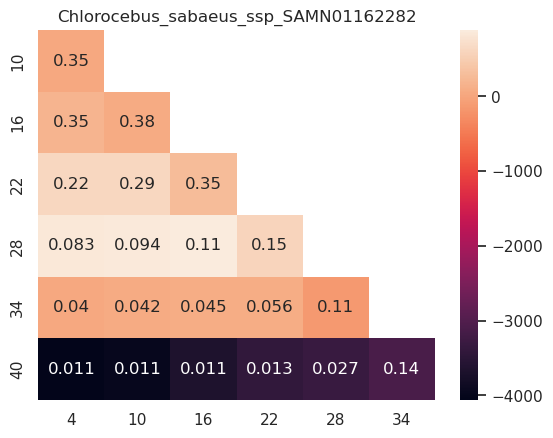

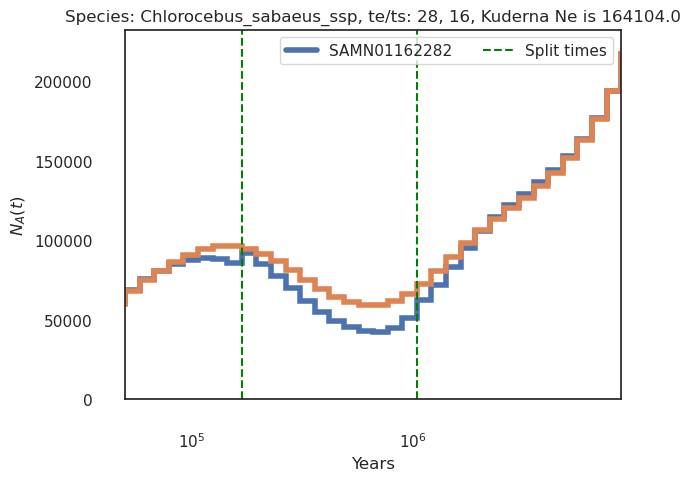

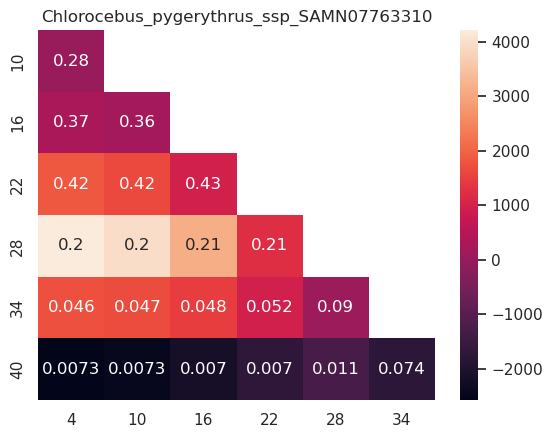

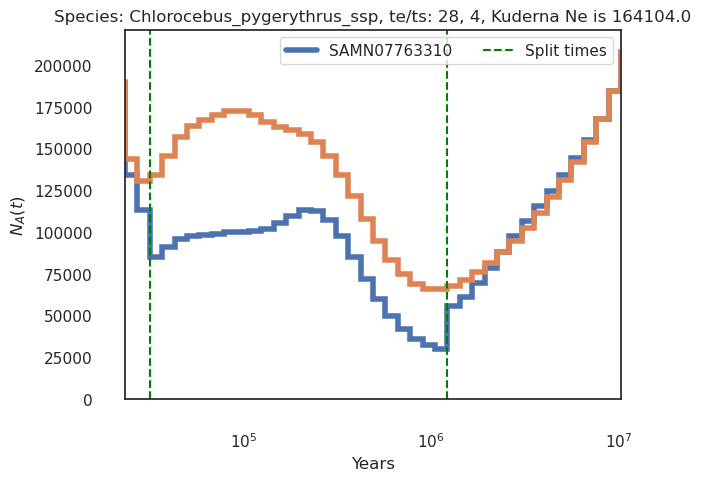

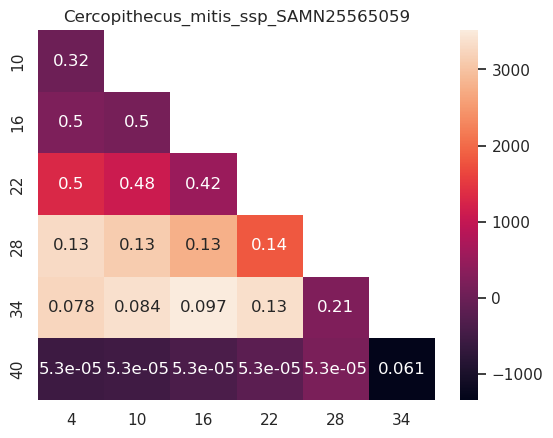

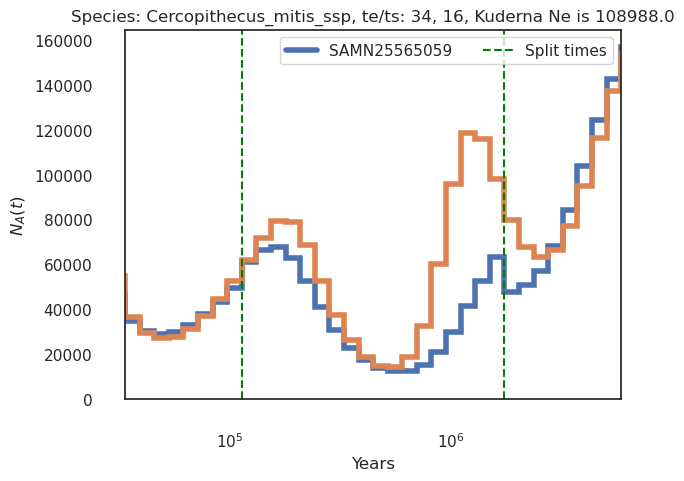

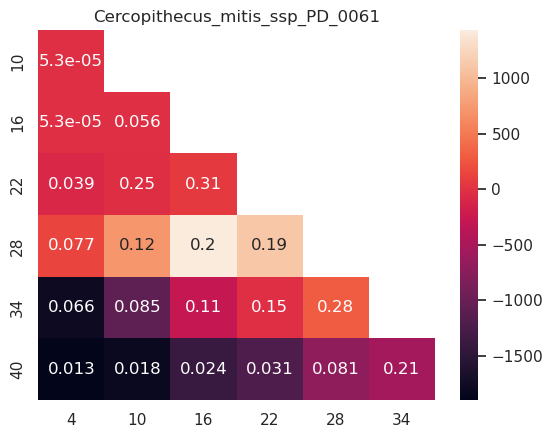

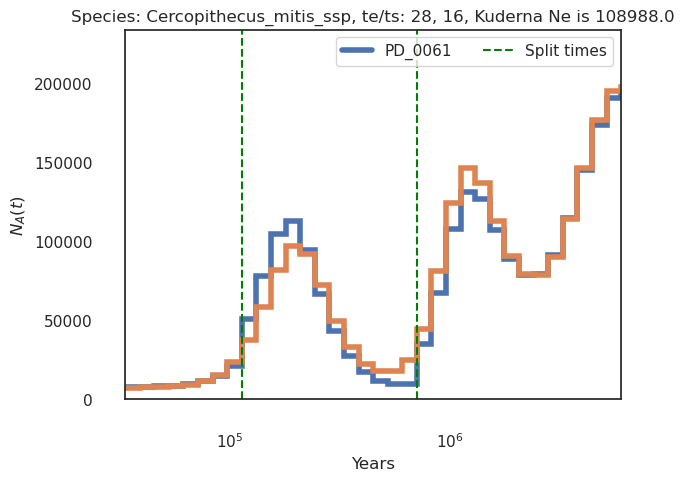

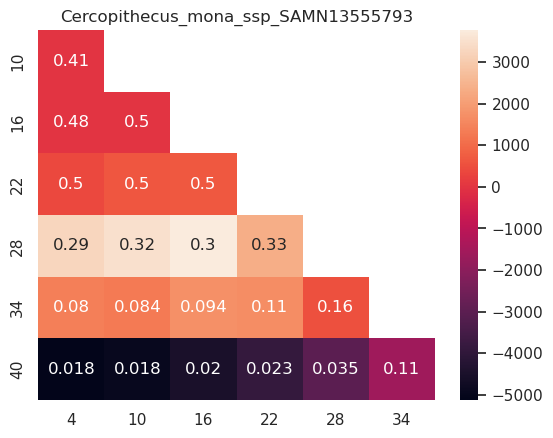

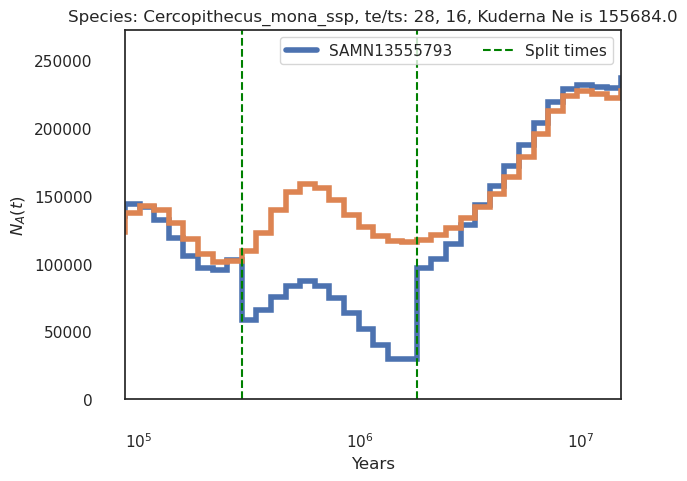

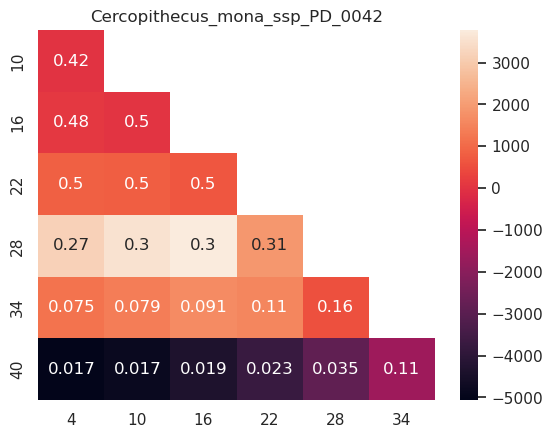

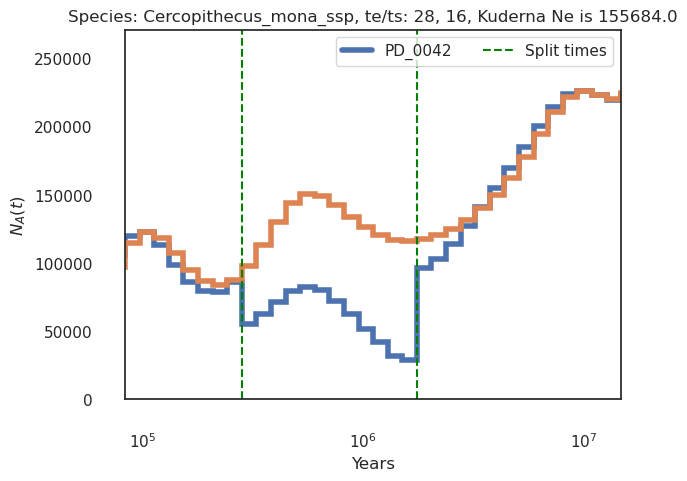

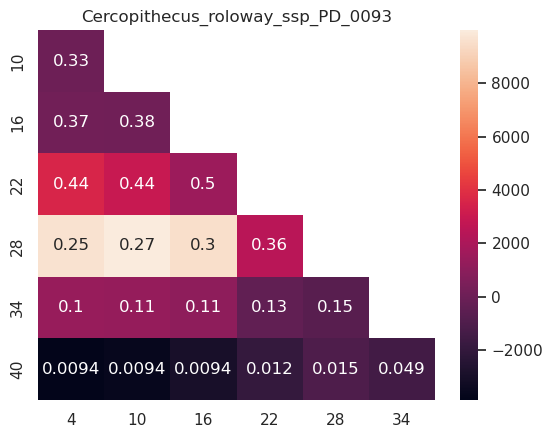

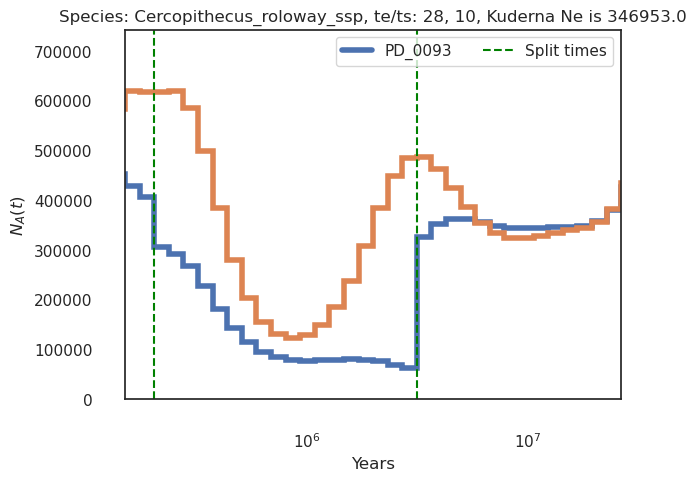

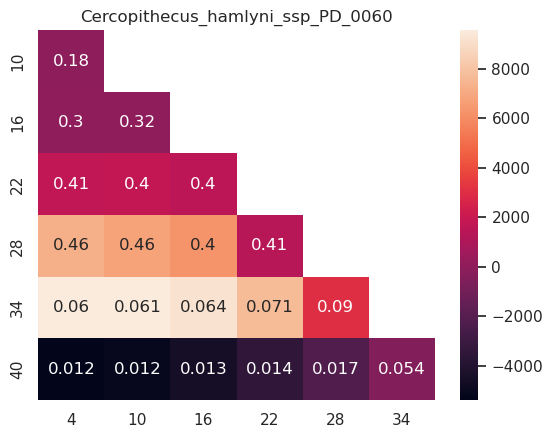

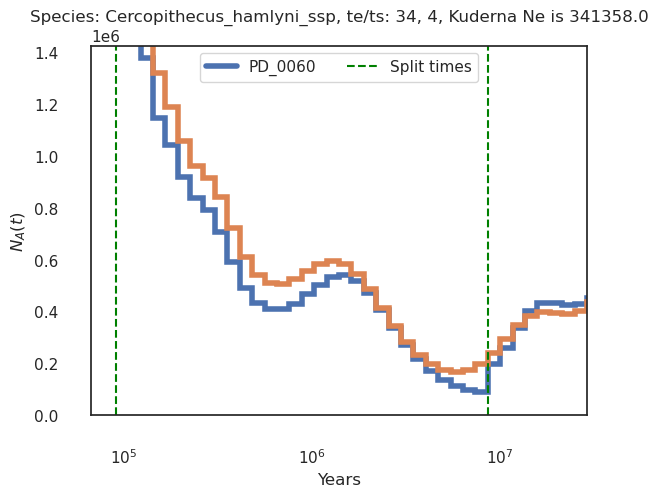

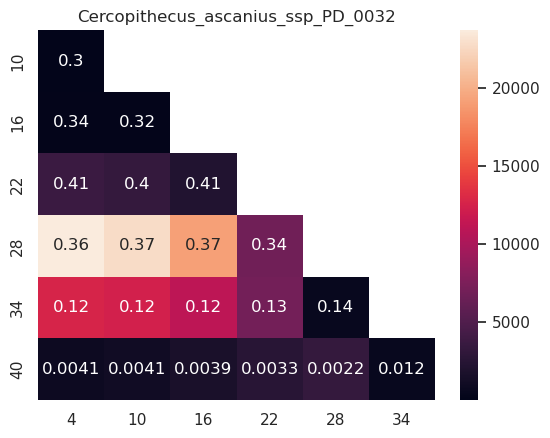

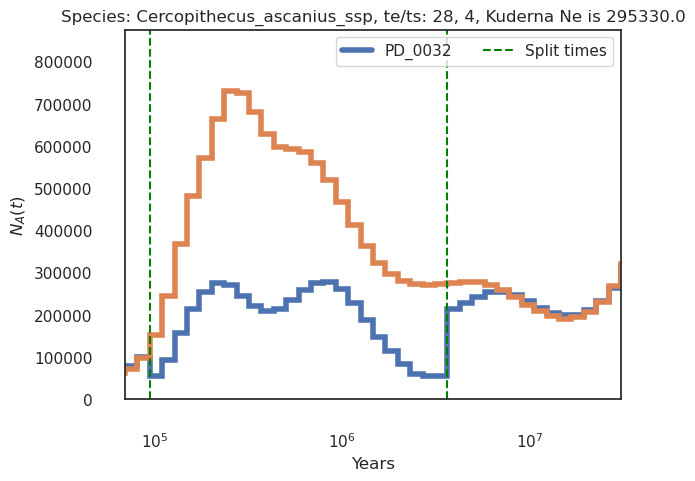

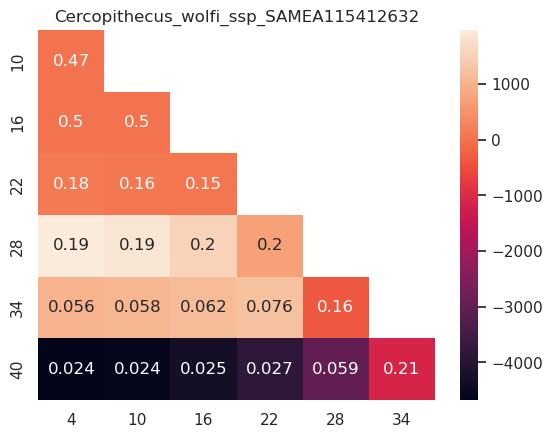

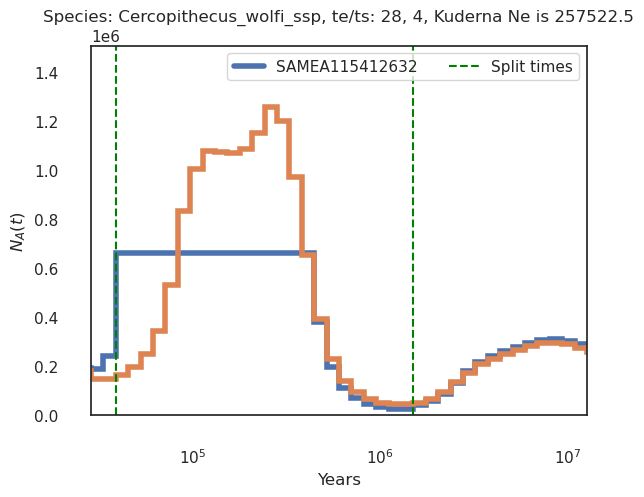

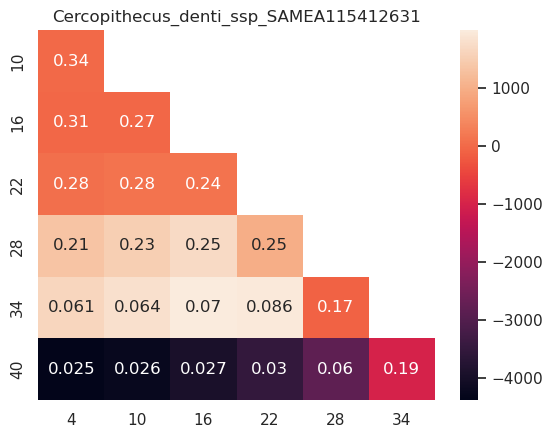

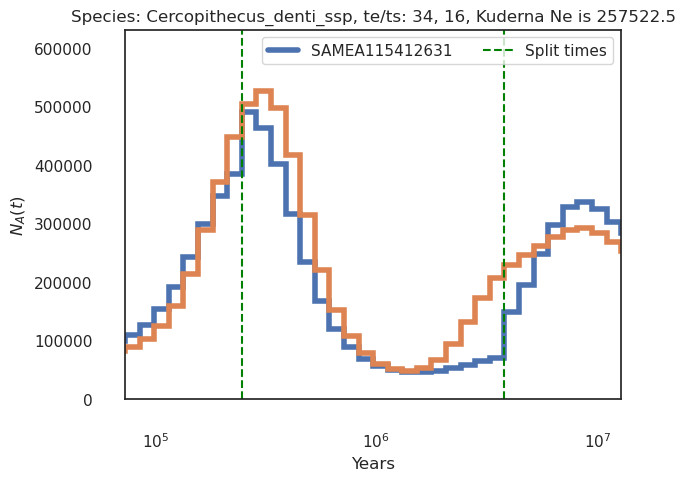

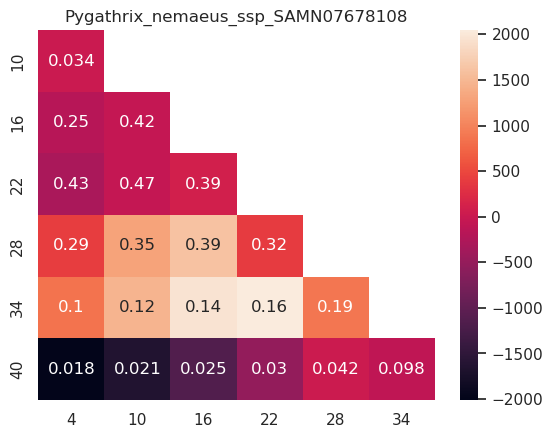

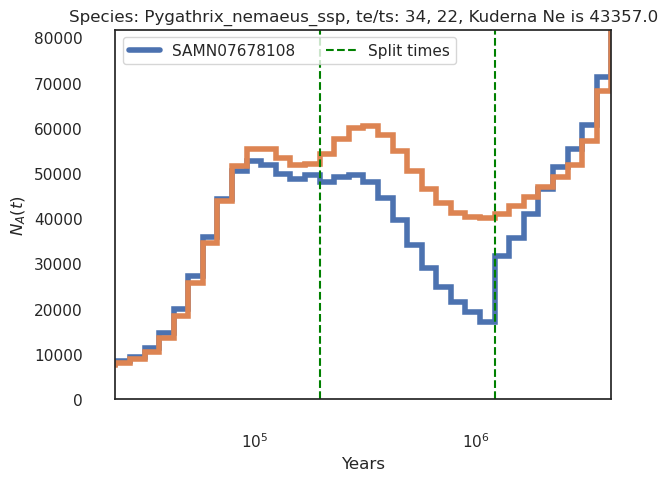

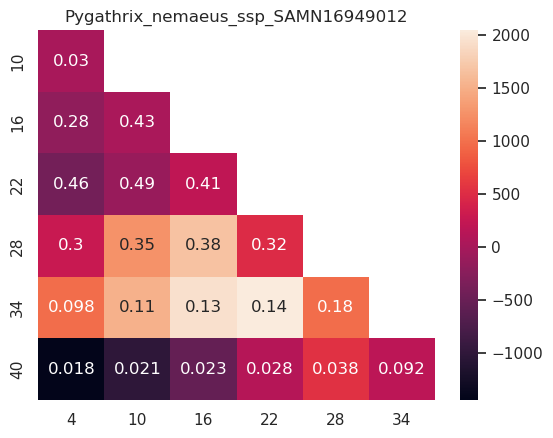

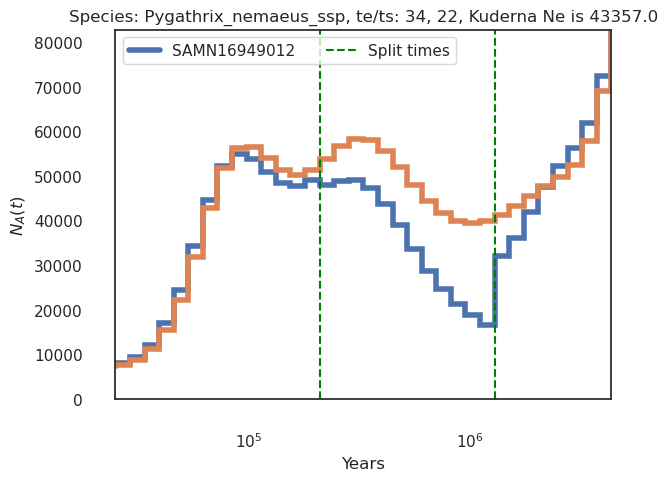

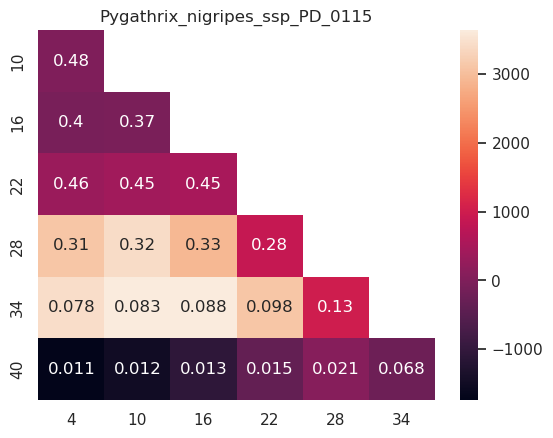

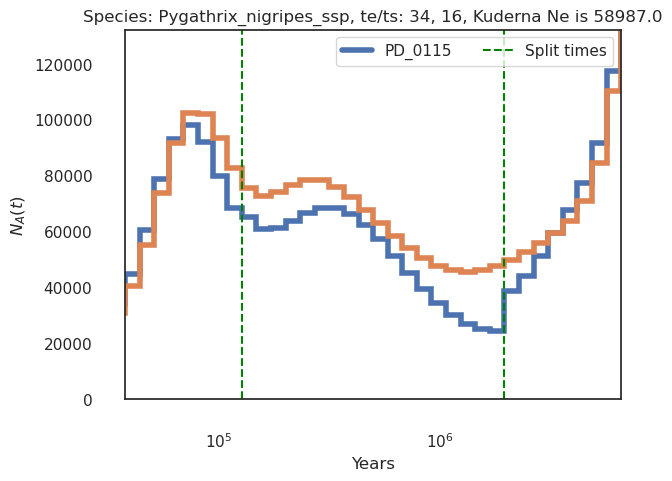

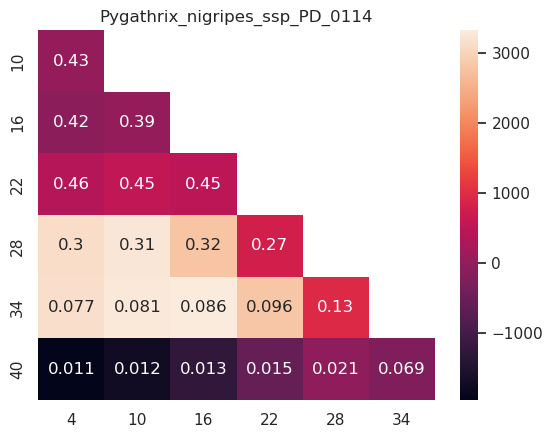

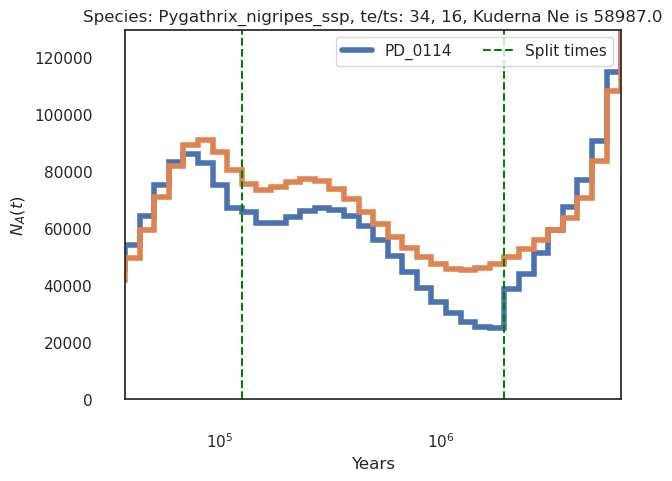

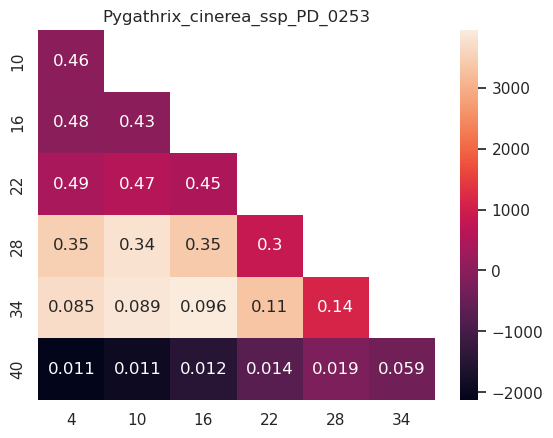

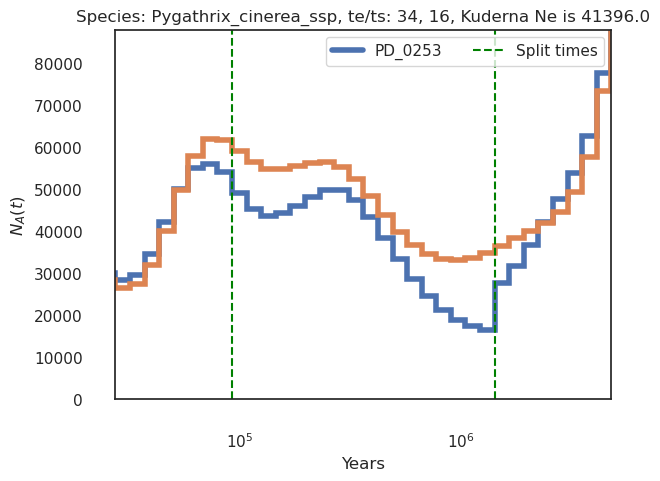

<Figure size 640x480 with 0 Axes>

In [43]:
for d in metadata_dirs[6:10]:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_gamma = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
                    matrix_LL_gamma[int((te-6)/6),int(ts/6)] = get_gamma_from_file(final_params_file_struct)
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs))
            g = sns.heatmap(matrix_LL_diffs, annot=matrix_LL_gamma)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()
            # Structured plot
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            # plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            scaled_time = (time_array/mu)*gen
            plt.xlim(scaled_time[min(zts-2, 8)],scaled_time[42])
            plt.ylim(-1, 1.2*max(((1/final_params[:,2])/mu)[8:42]))
            plt.stairs(edges=scaled_time,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Perodicticus_potto_ssp
SAMN37320038 -12296777.87989959 70.43093359097838
16 4 0.19459819314304413 ../steps/cobraa/SAMN37320038/aut_D50_ts4_te16_final_parameters.txt
8.76e-09 9.0
PD_0165 -16025075.682971857 134.13976550847292
16 4 0.17757793809524877 ../steps/cobraa/PD_0165/aut_D50_ts4_te16_final_parameters.txt
8.76e-09 9.0
Cheracebus_lucifer_ssp
PD_0313 -20851493.542603504 9218.856078404933
28 10 0.36558859086582385 ../steps/cobraa/PD_0313/aut_D50_ts10_te28_final_parameters.txt
4.88e-09 9.0
PD_0288 -21351511.98746078 10820.234430577606
28 10 0.3739165678035613 ../steps/cobraa/PD_0288/aut_D50_ts10_te28_final_parameters.txt
4.88e-09 9.0
Cheracebus_torquatus_ssp
PD_0285 -16616127.027380783 4687.1967728529125
34 22 0.13544603024992105 ../steps/cobraa/PD_0285/aut_D50_ts22_te34_final_parameters.txt
5.77e-09 8.0
Cheracebus_lugens_ssp
PD_0001 -9617584.109901067 1468.5175152234733
40 34 0.27938555263851744 ../steps/cobraa/PD_0001/aut_D50_ts34_te40_final_parameters.txt
3.91e-09 8.0
PD_0320 -1077

/tmp/12758059/ipykernel_1062328/1861964365.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


SAMN21582229 -9490791.36683486 1169.8729178663343
28 16 0.4090905332298863 ../steps/cobraa/SAMN21582229/aut_D50_ts16_te28_final_parameters.txt
3.84e-09 6.0
PD_0116 -10221625.737957697 709.9322877004743
34 22 0.18083821197782934 ../steps/cobraa/PD_0116/aut_D50_ts22_te34_final_parameters.txt
3.84e-09 6.0


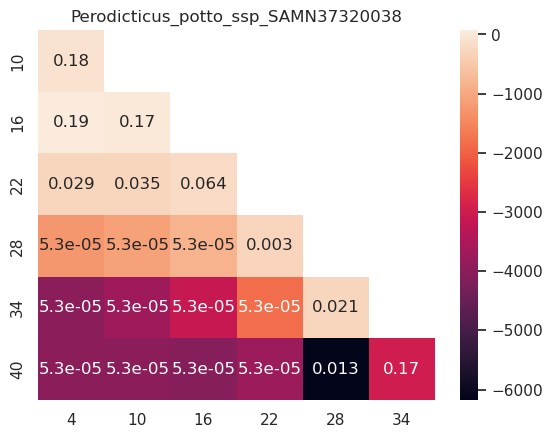

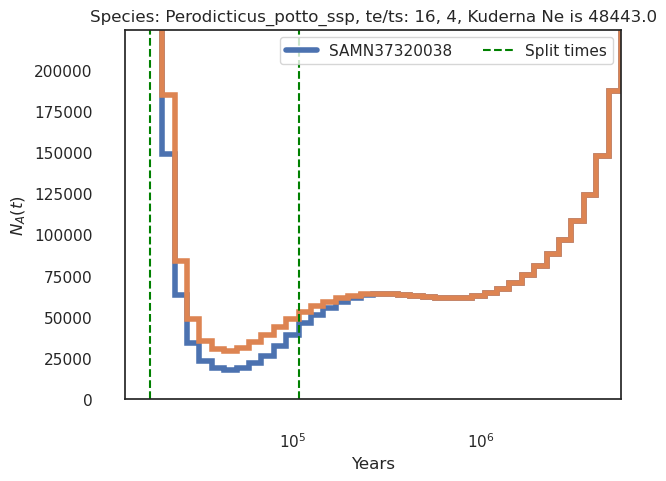

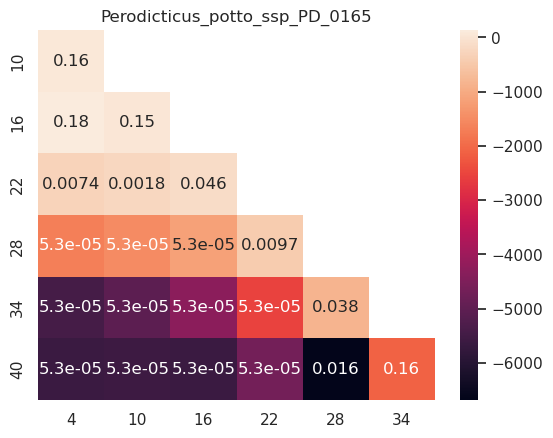

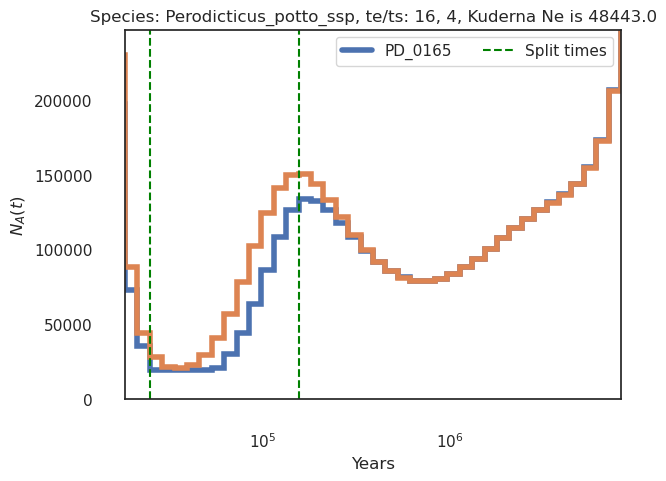

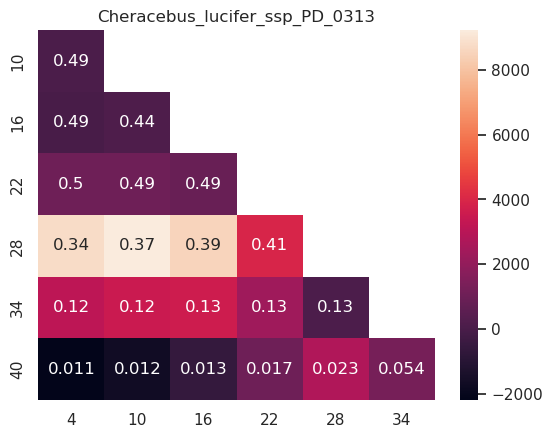

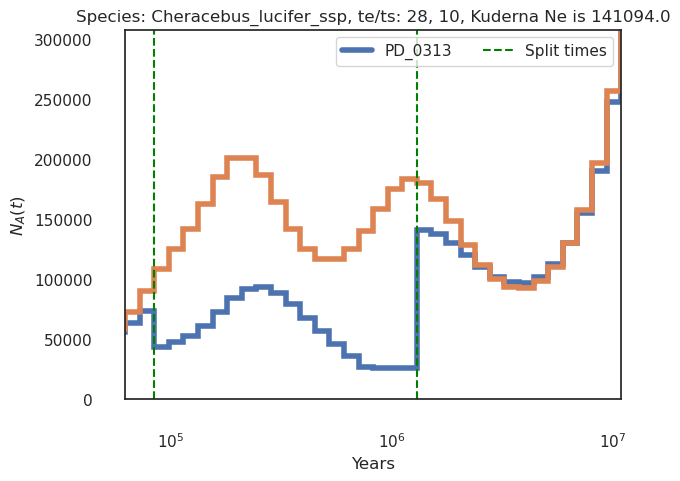

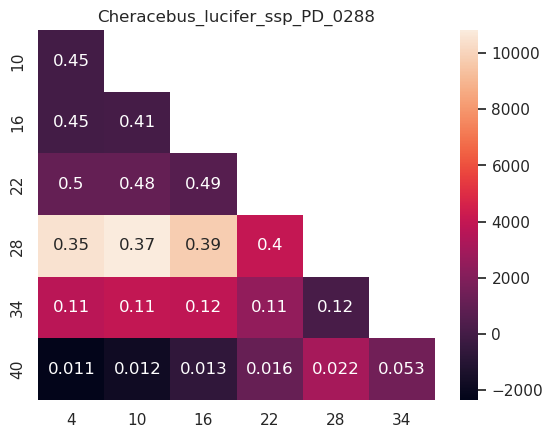

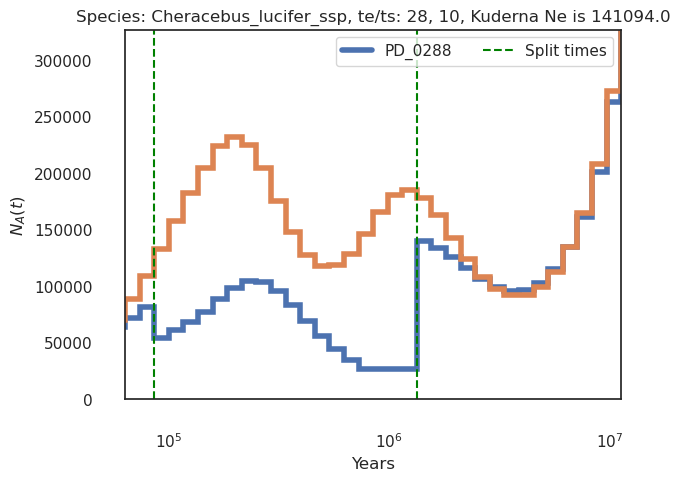

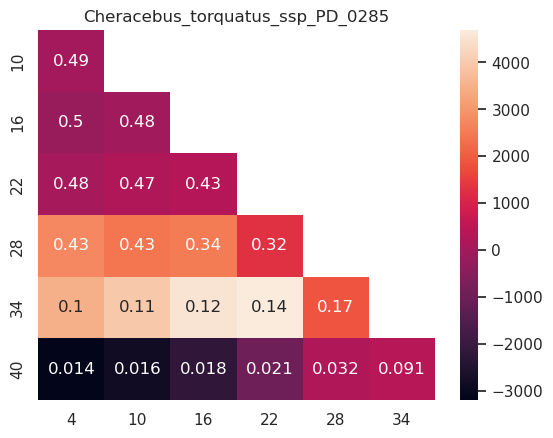

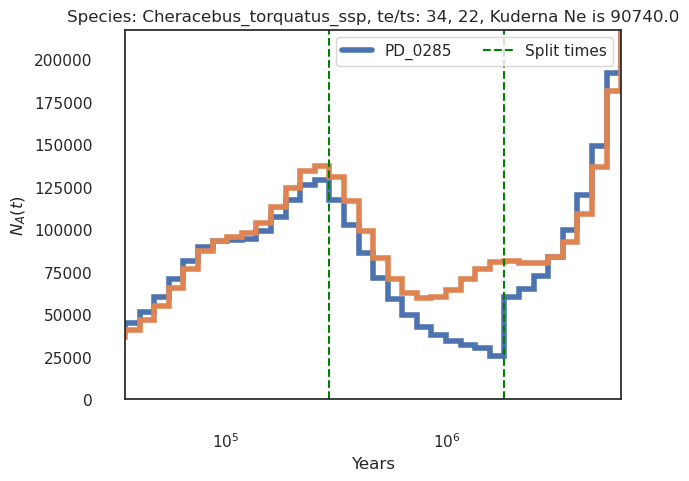

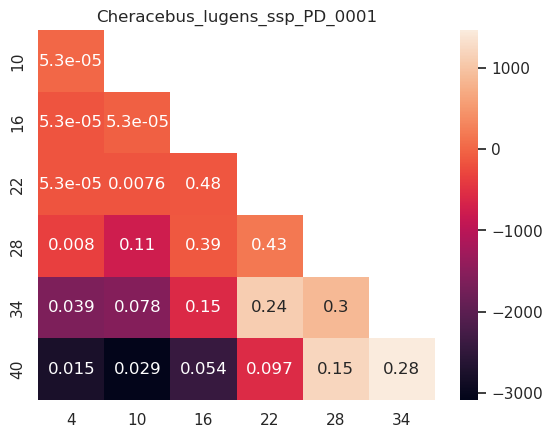

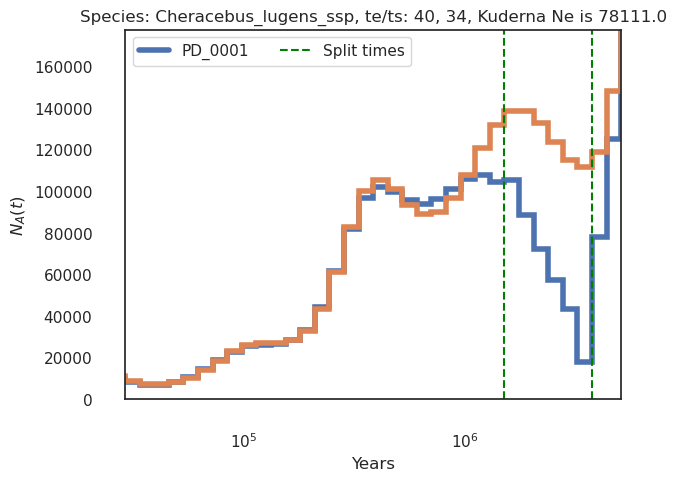

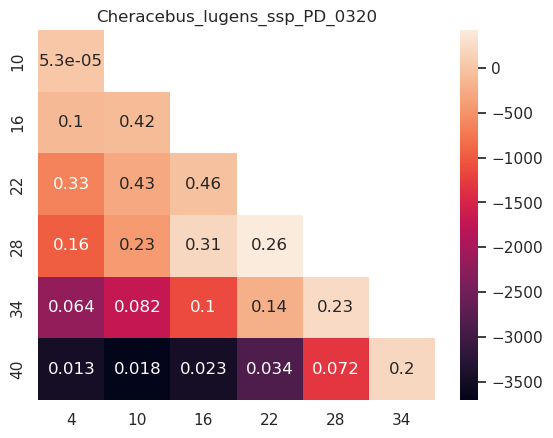

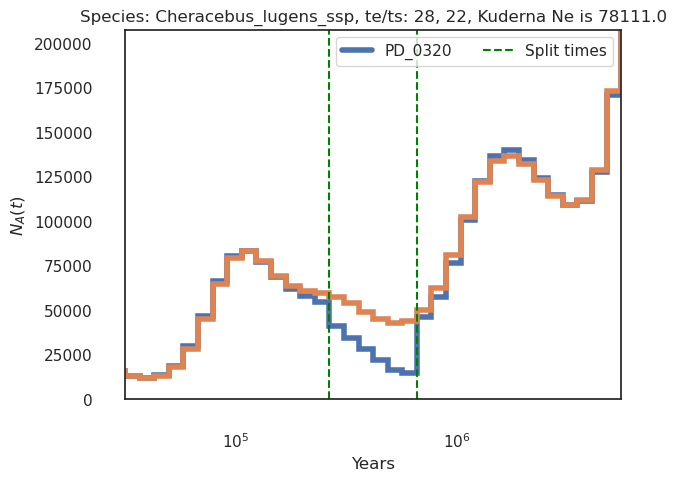

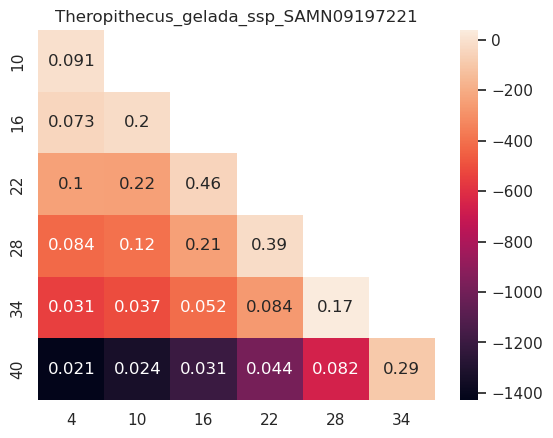

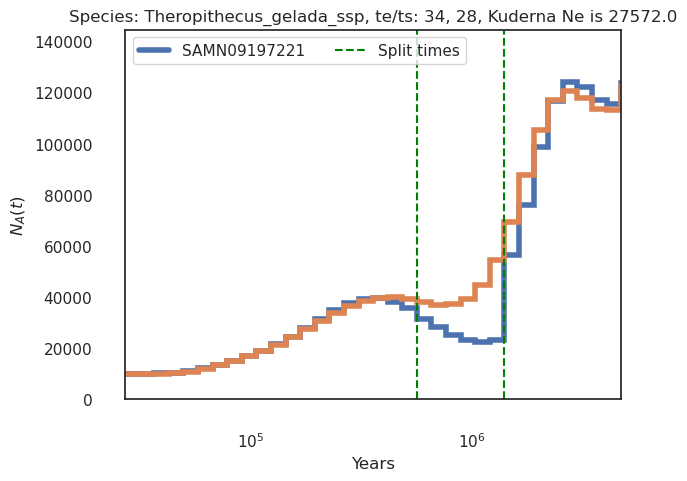

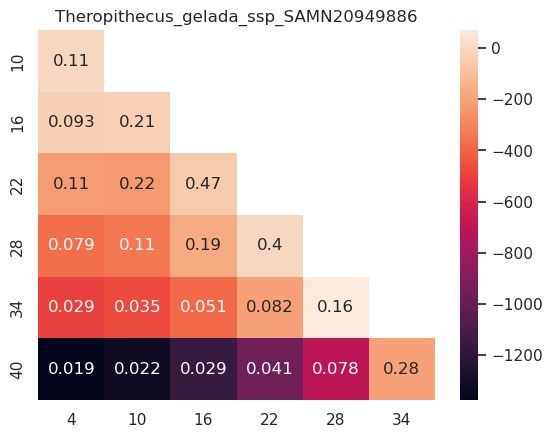

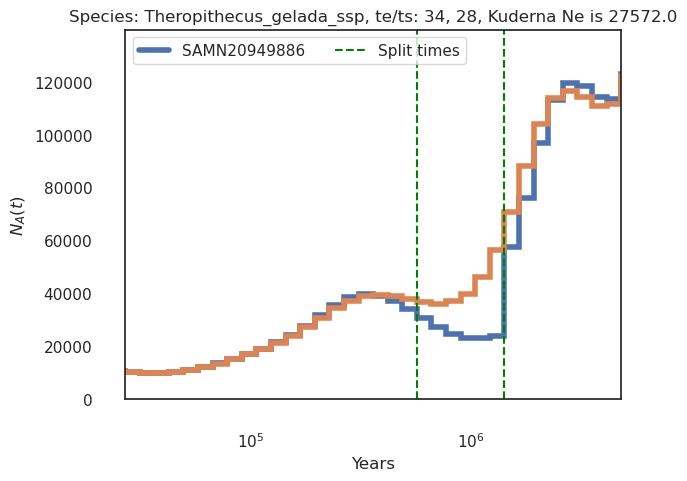

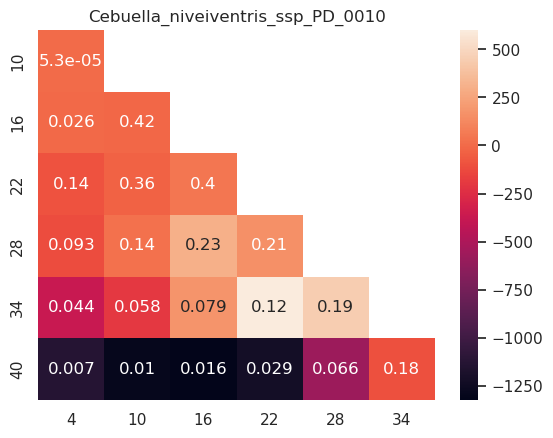

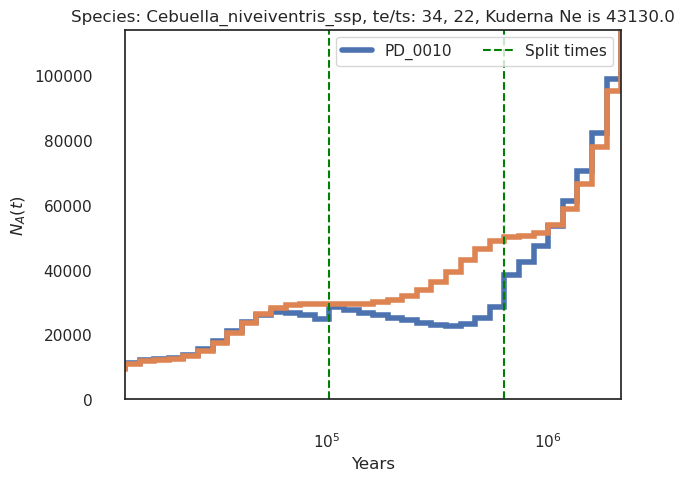

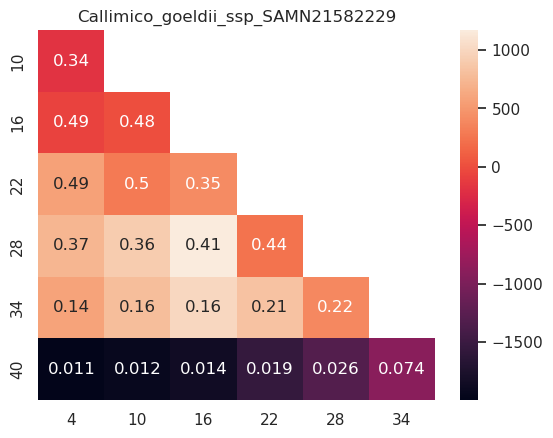

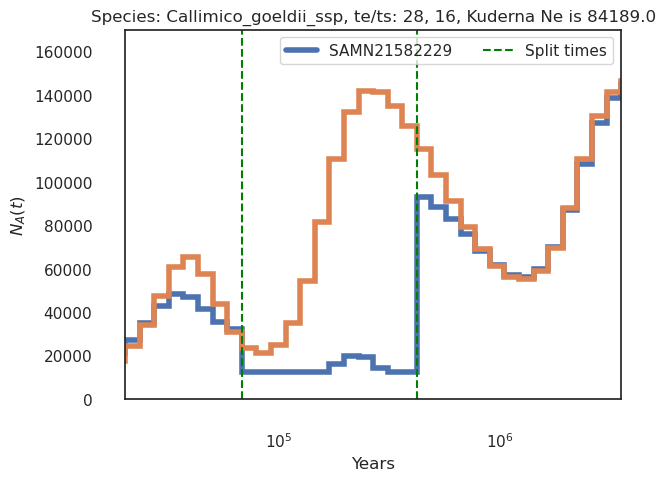

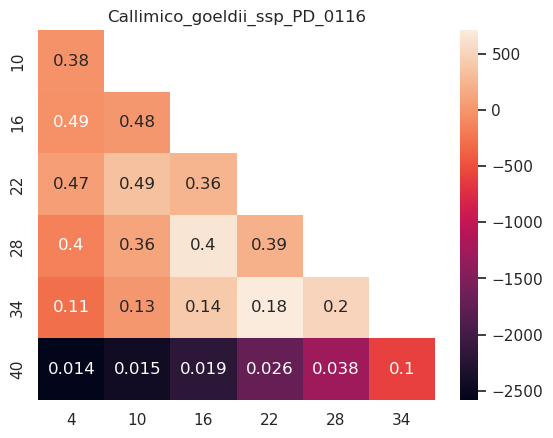

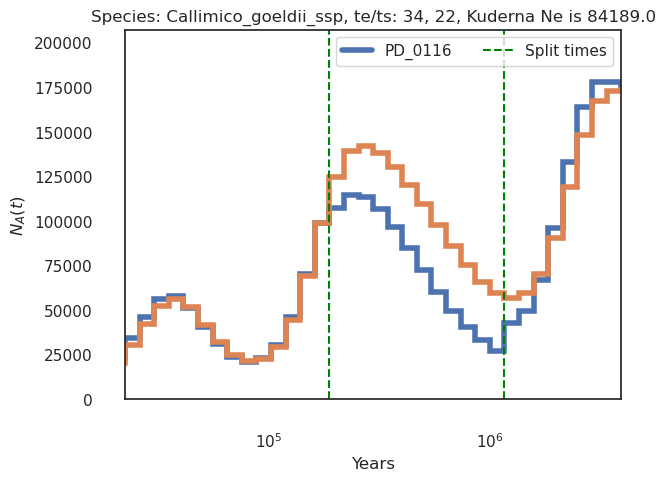

<Figure size 640x480 with 0 Axes>

In [44]:
for d in metadata_dirs[10:15]:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_gamma = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
                    matrix_LL_gamma[int((te-6)/6),int(ts/6)] = get_gamma_from_file(final_params_file_struct)
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs))
            g = sns.heatmap(matrix_LL_diffs, annot=matrix_LL_gamma)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()
            # Structured plot
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            # plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            scaled_time = (time_array/mu)*gen
            plt.xlim(scaled_time[min(zts-2, 8)],scaled_time[42])
            plt.ylim(-1, 1.2*max(((1/final_params[:,2])/mu)[8:42]))
            plt.stairs(edges=scaled_time,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Ateles_marginatus_ssp
PD_0076 -13340382.480069315 2725.6600586865097
34 22 0.12253204903583978 ../steps/cobraa/PD_0076/aut_D50_ts22_te34_final_parameters.txt
1.08e-08 15.0
Ateles_belzebuth_ssp
PD_0138 -16677341.643282995 5061.373249674216
34 16 0.2114715319066679 ../steps/cobraa/PD_0138/aut_D50_ts16_te34_final_parameters.txt
8.94e-09 15.0
PD_0004 -16579910.854095642 5050.077294036746
34 16 0.21265680182808686 ../steps/cobraa/PD_0004/aut_D50_ts16_te34_final_parameters.txt
8.94e-09 15.0
Ateles_chamek_ssp
PD_0431 -18886891.953373473 4006.553486570716
28 10 0.281925093725857 ../steps/cobraa/PD_0431/aut_D50_ts10_te28_final_parameters.txt
1.07e-08 15.0
PD_0139 -19362357.114737265 4989.86611283198
28 10 0.2950547193651777 ../steps/cobraa/PD_0139/aut_D50_ts10_te28_final_parameters.txt
1.07e-08 15.0
Ateles_geoffroyi_ssp
Allenopithecus_nigroviridis_ssp
SAMN15801446 -13499631.412645213 2252.2167789470404
28 16 0.3309860460001021 ../steps/cobraa/SAMN15801446/aut_D50_ts16_te28_final_parameters.txt


/tmp/12758059/ipykernel_1062328/1086214811.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


PD_0017 -15805446.4786051 4254.685465596616
34 22 0.11789255862387388 ../steps/cobraa/PD_0017/aut_D50_ts22_te34_final_parameters.txt
4.19e-09 6.0
Leontocebus_fuscicollis_ssp
PD_0352 -15897385.172563942 4003.3285851106048
34 22 0.10843487968257307 ../steps/cobraa/PD_0352/aut_D50_ts22_te34_final_parameters.txt
8.24e-09 9.0


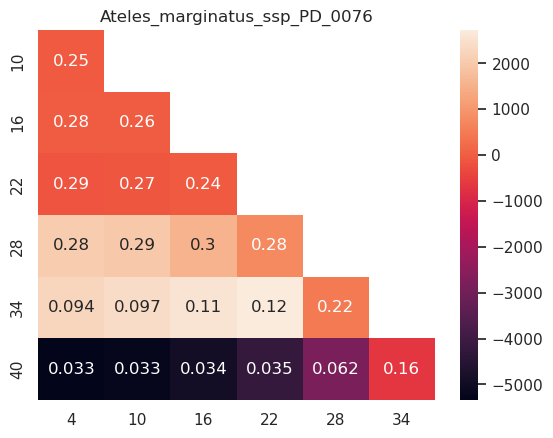

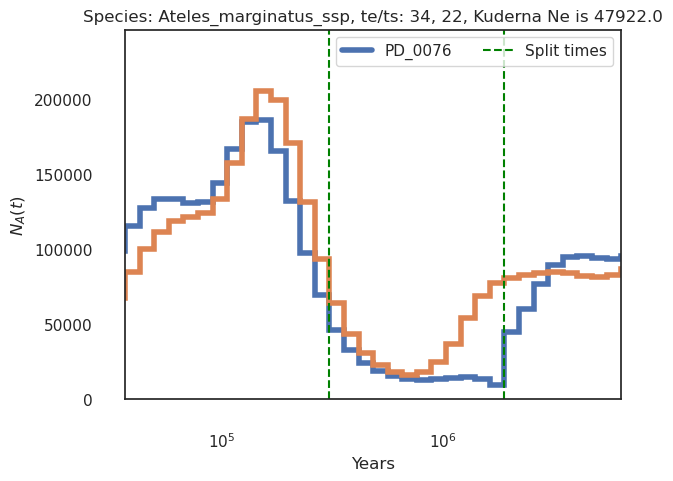

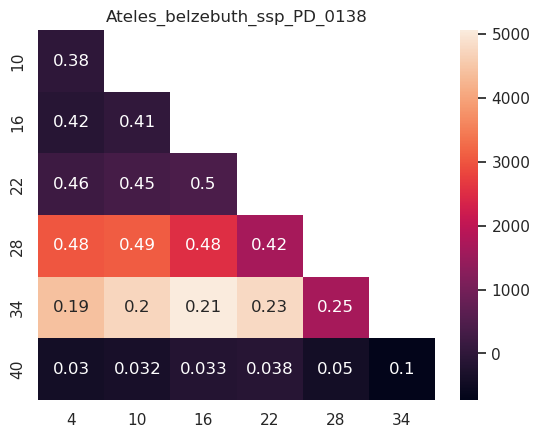

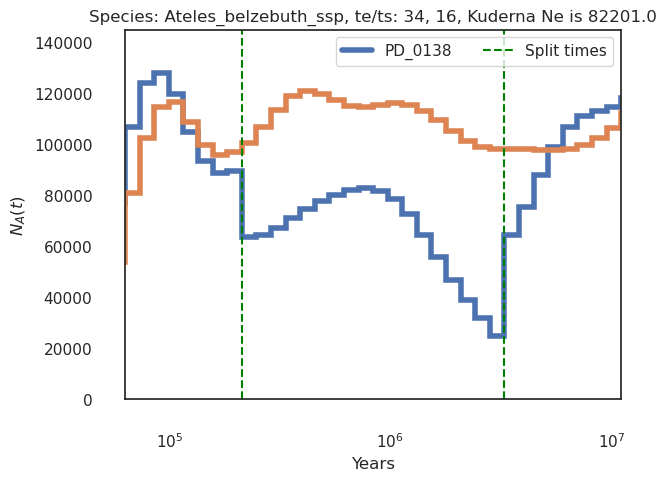

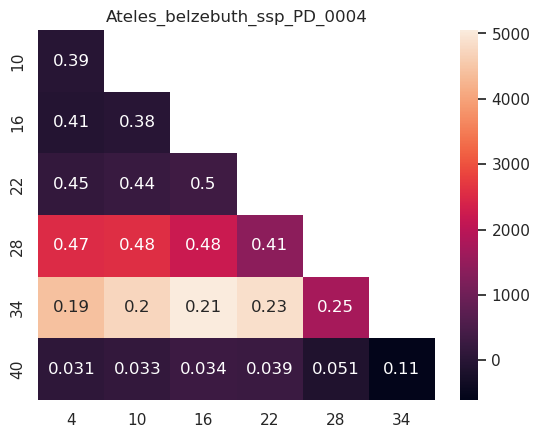

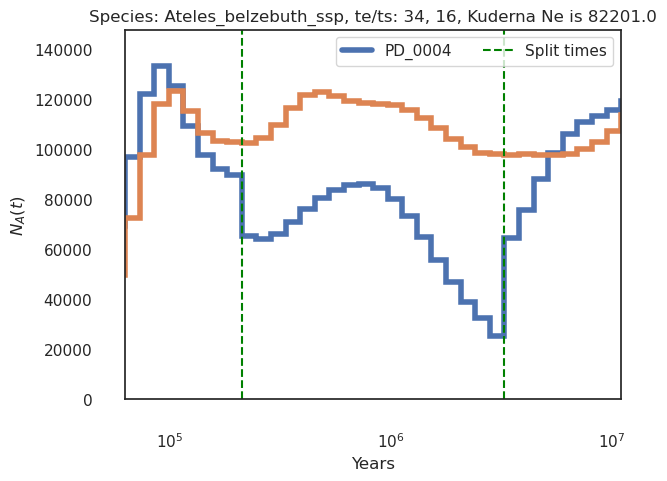

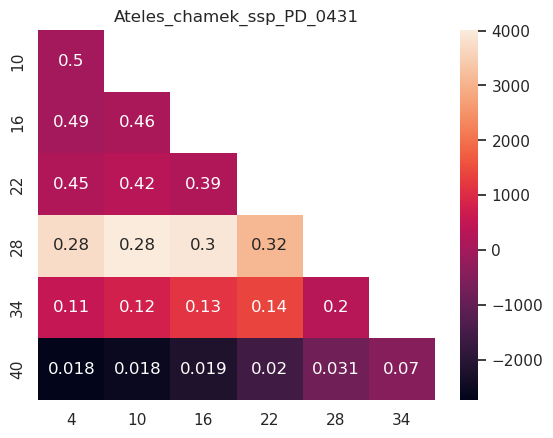

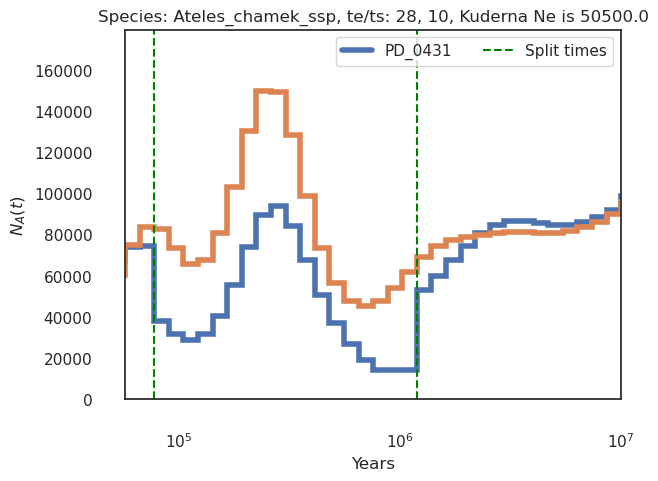

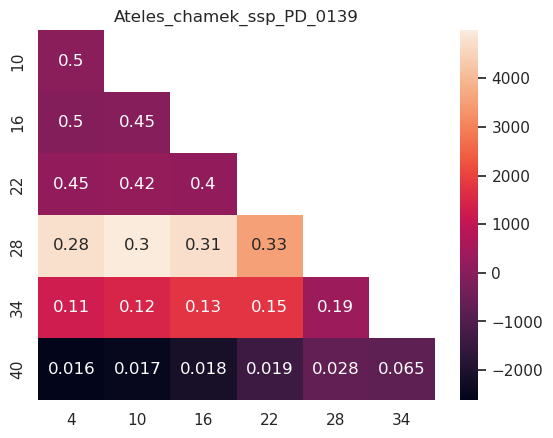

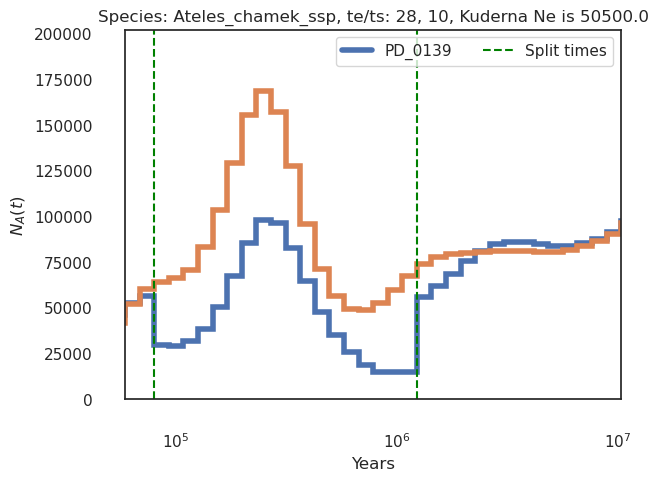

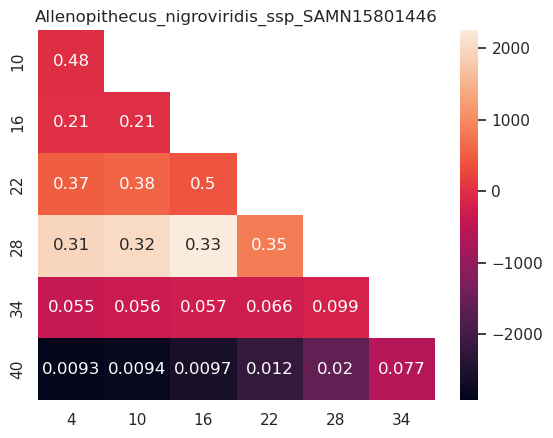

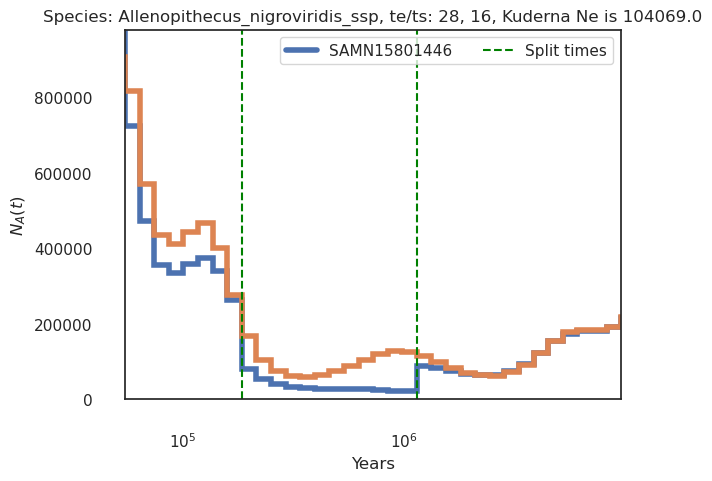

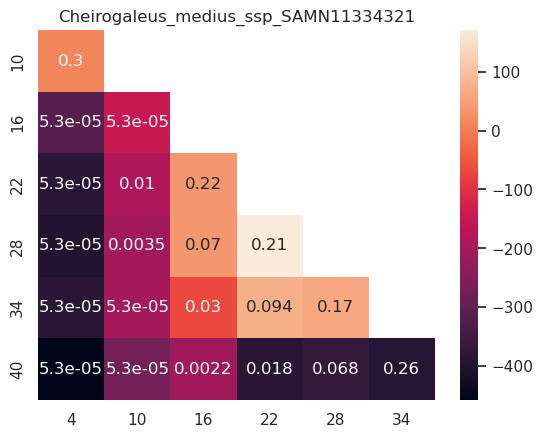

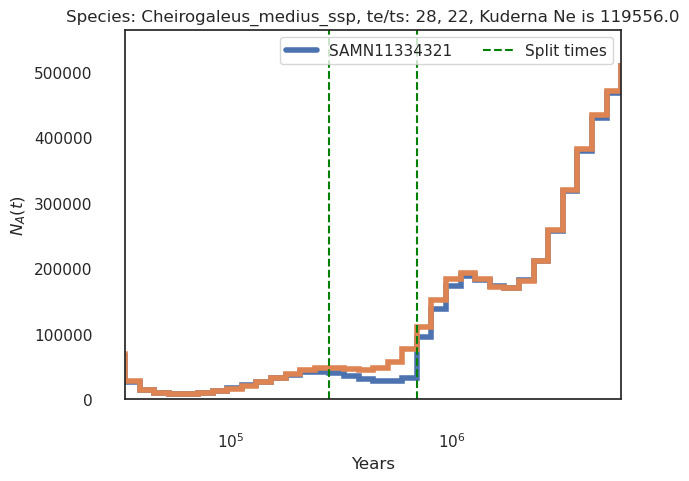

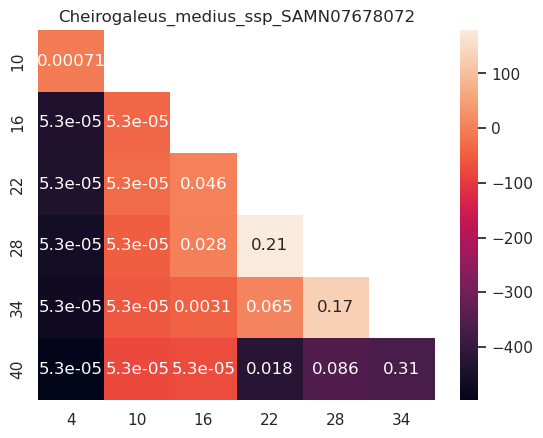

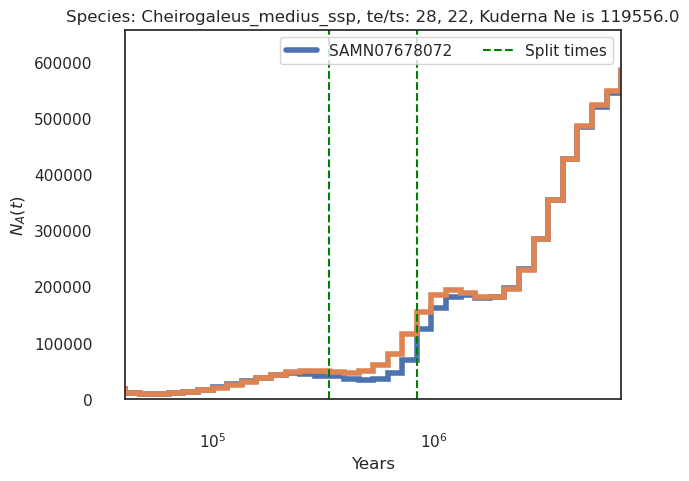

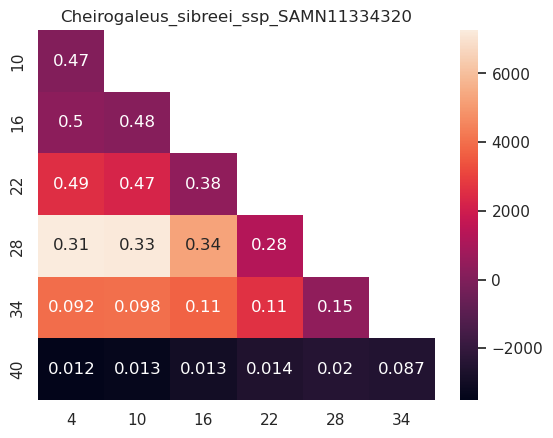

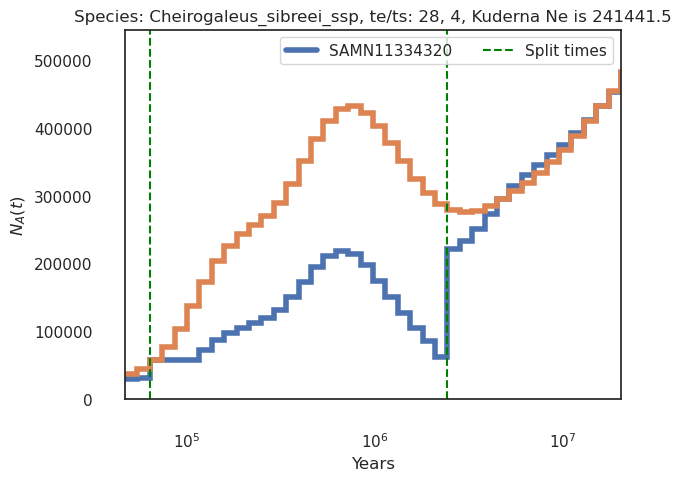

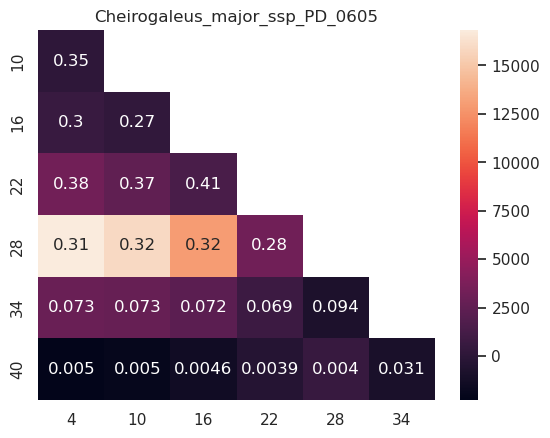

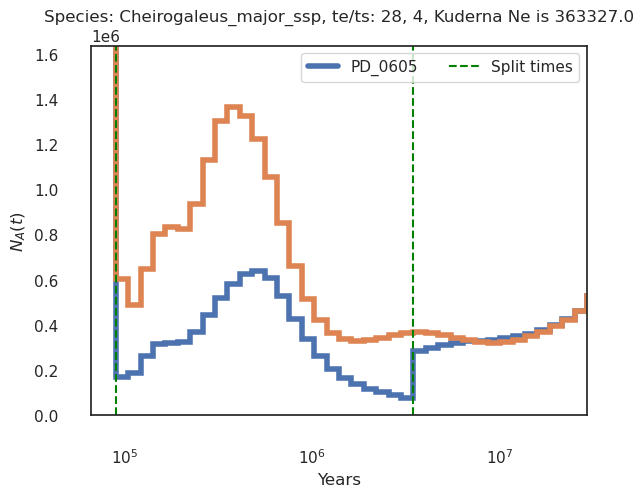

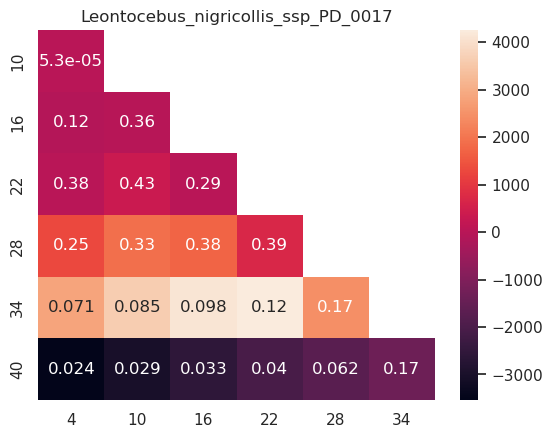

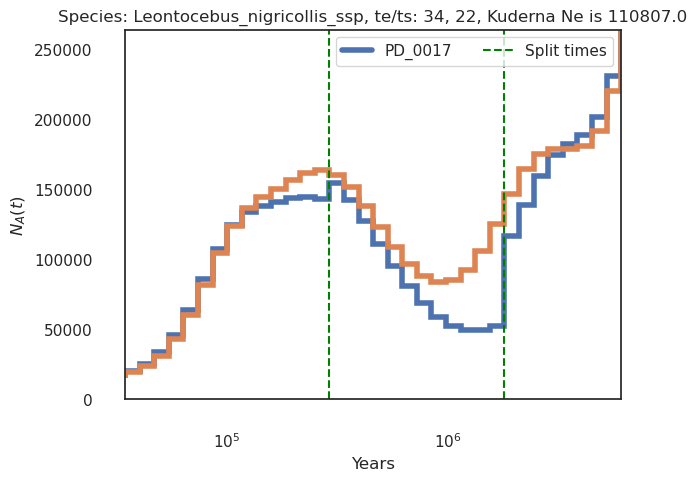

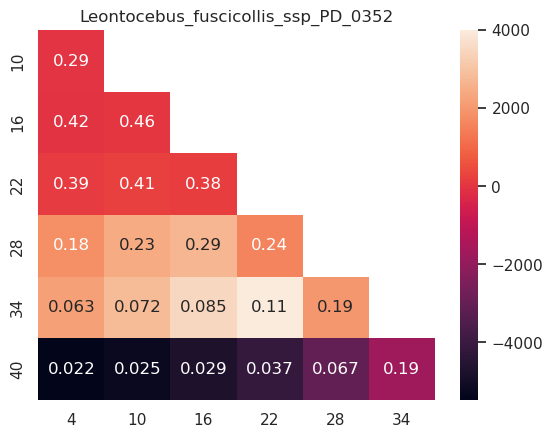

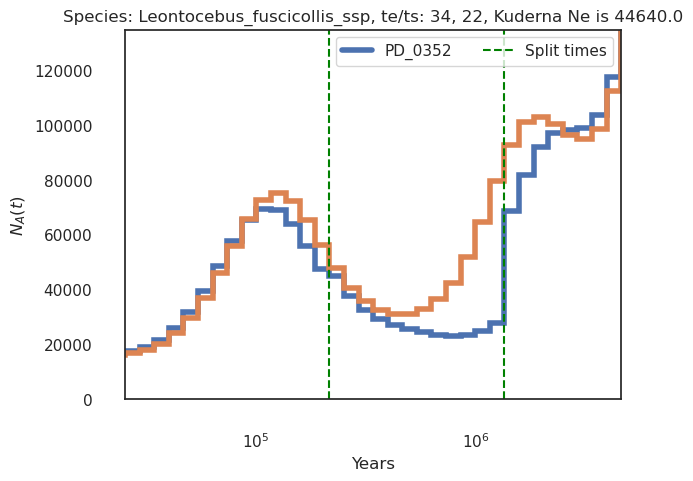

<Figure size 640x480 with 0 Axes>

In [45]:
for d in metadata_dirs[15:20]:
    # Identify IDs
    dir_metadata = pd.read_csv(d, sep="\t")
    dir_metadata["gss"] = dir_metadata.GENUS+"_"+dir_metadata.SPECIES+"_"+dir_metadata.SUBSPECIES
    short_species = d.split("/")[-1].split("_")[0]
    female_df = dir_metadata[pd.to_numeric(dir_metadata['AVG_COVERAGE_X'], errors='coerce').notnull()]
    female_df = female_df.loc[(female_df.GENETIC_SEX == "F") & (female_df.AVG_COVERAGE_A >= 10)].sort_values(by="AVG_COVERAGE_A", ascending=False)
    sorted_df = female_df
    # Go through every unique genotype calling set.
    for gvcf_folder in sorted_df.GVCF_FOLDER.unique():
        print(gvcf_folder)
        # Pick all inds that are present in the cobraa analysis.
        species_df = sorted_df.loc[sorted_df.GVCF_ID.isin(ind_list) & (sorted_df.GVCF_FOLDER == gvcf_folder)]
        for ind in species_df.GVCF_ID:
            final_params_file_pan = f'../steps/cobraa/{ind}/aut_final_parameters.txt'
            pan_LL = get_LL_from_file(final_params_file_pan)
            matrix_LL_diffs = np.zeros(shape=(6,6))
            matrix_LL_gamma = np.zeros(shape=(6,6))
            matrix_LL_diffs[:] = np.nan
            for te in range(10, 42, 6):
                for ts in range(4, te-4, 6):
                    final_params_file_struct = f'../steps/cobraa/{ind}/aut_D50_ts{ts}_te{te}_final_parameters.txt'
                    struct_LL = get_LL_from_file(final_params_file_struct)
                    diff_LL = struct_LL - pan_LL
                    matrix_LL_diffs[int((te-6)/6),int(ts/6)] = diff_LL
                    matrix_LL_gamma[int((te-6)/6),int(ts/6)] = get_gamma_from_file(final_params_file_struct)
            matrix_LL_diffs = matrix_LL_diffs
            print(ind, pan_LL, np.nanmax(matrix_LL_diffs))
            g = sns.heatmap(matrix_LL_diffs, annot=matrix_LL_gamma)
            g.set(xticklabels=list(range(4, te-4, 6)), yticklabels=list(range(10, 42, 6)),title=gvcf_folder+"_"+ind)
            plt.figure()
            # Structured plot
            structured_files = glob.glob(f'../steps/cobraa/{ind}/aut_D50_ts*_te*_final_parameters.txt')
            zte, zts, ztheta, zrho, zgamma, lambdaA_parameters, lambdaB_parameters, best_param_file = find_best(structured_files)
            label_tag = best_param_file.split("/")[-2]
            print(zte, zts, zgamma, best_param_file)
            ind_inf = all_inds.loc[all_inds.GVCF_ID == label_tag]
            gs = ind_inf.GENUS.iloc[0]+"_"+ind_inf.SPECIES.iloc[0]
            gs_df = df_species_mut.loc[df_species_mut.SPECIES_BINOMIAL == gs]
            g_df = df_species_mut.loc[df_species_mut.GENUS == ind_inf.GENUS.iloc[0]] 
            if len(gs_df) > 0:
                mu = gs_df.MU_PER_GENERATION.mean()
                gen = gs_df.GENERATION_LENGTH.mean()
                kuderna_Ne = gs_df.EFFECTIVE_POP_SIZE.mean()
            elif len(g_df) > 0:
                mu = g_df.MU_PER_GENERATION.mean()
                gen = g_df.GENERATION_LENGTH.mean()
                kuderna_Ne = g_df.EFFECTIVE_POP_SIZE.mean()
            print(mu, gen)
            final_params = np.loadtxt(best_param_file)
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            plt.stairs(edges=(time_array/mu)*gen,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            # plt.stairs(edges=(time_array[zts:zte+1]/mu)*gen,values=(1/final_params[zts:zte,3])/mu,label='',linewidth=4,linestyle="solid",baseline=None,color="grey",alpha=0.3)
            plt.axvline((time_array[zts]/mu)*gen,color="green",linestyle="dashed")  
            plt.axvline((time_array[zte]/mu)*gen,label="Split times",color="green",linestyle="dashed")    
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.legend(ncol=2)
            # Unstructured for comp
            final_params = np.loadtxt(f'../steps/cobraa/{ind}/aut_final_parameters.txt')
            time_array = list(final_params[:,1])
            time_array.insert(0,0)
            time_array = np.array(time_array)
            scaled_time = (time_array/mu)*gen
            plt.xlim(scaled_time[min(zts-2, 8)],scaled_time[42])
            plt.ylim(-1, 1.2*max(((1/final_params[:,2])/mu)[8:42]))
            plt.stairs(edges=scaled_time,values=(1/final_params[:,2])/mu,label=label_tag,linewidth=4,linestyle="solid",baseline=None)
            #plt.ylim(0,20e+04)
            plt.xscale('log')
            plt.ylabel('$N_A(t)$')
            plt.xlabel('Years')
            plt.tick_params(which='major',length=20)
            plt.tick_params(which='minor',length=10)
            plt.title("Species: {}, te/ts: {}, {}, Kuderna Ne is {}".format(gvcf_folder, zte, zts, kuderna_Ne))
            plt.figure()

Conclusion: Many of the cases with slight improvements do not seem convincing. However, there are some species, such as Ascanius which have a very strong signal.

Determining the correct cutoff. Comparing a good case to a weak case.